In [814]:
### Importing all the required packages and loading csv files
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV #for fine tuning
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder




In [792]:
data = pd.read_csv('Dataset/Dataset.txt')
Attack_data = pd.read_csv('Dataset/Attack_types.txt')

### Making two seperate columns of attack types and categories in attacktype.txt

In [793]:
Attack_data[['attack_category', 'attack_type']] = Attack_data['attack_category attack_type'].str.split(' ', expand=True)
Attack_data.drop('attack_category attack_type',axis = 1, inplace=True)
Attack_data.sample(5)

,attack_category,attack_type
16,xterm,u2r
22,imap,r2l
31,xlock,r2l
0,apache2,dos
17,sqlattack,u2r


In [794]:
data.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
109202,0,tcp,ctf,S0,0,0,0,0,0,0,...,0.02,0.07,0.00,0.00,1.00,1.00,0.00,0.0,neptune,20
53795,0,udp,private,SF,1,0,0,0,0,0,...,0.27,0.17,0.89,0.00,0.00,0.00,0.11,0.0,satan,18
88187,0,tcp,other,REJ,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.09,0.00,0.90,1.0,satan,18
42071,0,tcp,smtp,SF,1075,372,0,0,0,0,...,0.84,0.13,0.03,0.01,0.03,0.01,0.00,0.0,normal,21
115709,34,tcp,telnet,SF,119,10493,0,0,0,0,...,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.0,normal,20


### Mapping Attack Category with Attack Type using merge that is equivalent of join in DB

In [795]:
data = data.merge(Attack_data, on='attack_category', how='left')

In [796]:
data.sample(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
104074,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal,21,NaN
87857,0,udp,domain_u,SF,46,46,0,0,0,0,...,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal,18,NaN
56894,0,tcp,http,SF,335,6357,0,0,0,0,...,0.00,0.05,0.01,0.0,0.0,0.0,0.0,normal,21,NaN


### Checking null values in the dataset

In [797]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125984 entries, 0 to 125983
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125984 non-null  int64  
 1   protocol_type                125984 non-null  object 
 2   service                      125984 non-null  object 
 3   flag                         125984 non-null  object 
 4   src_bytes                    125984 non-null  int64  
 5   dst_bytes                    125984 non-null  int64  
 6   land                         125984 non-null  int64  
 7   wrong_fragment               125984 non-null  int64  
 8   urgent                       125984 non-null  int64  
 9   hot                          125984 non-null  int64  
 10  num_failed_logins            125984 non-null  int64  
 11  logged_in                    125984 non-null  int64  
 12  num_compromised              125984 non-null  int64  
 13 

### No corresponding entry for normal in attack type so it resulted in null values. Replace them with Normal class

In [798]:
data['attack_type'] = data['attack_type'].replace(np.nan,'normal')

In [799]:
data['attack_type'].value_counts()['normal']

67343

In [645]:
# dummyy = data.copy()
# dummy['ratio'] = dummy['src_bytes']-dummy['dst_bytes']
# dummy[['ratio','attack_type']]

### Null in Attack removed

In [800]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125984 entries, 0 to 125983
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125984 non-null  int64  
 1   protocol_type                125984 non-null  object 
 2   service                      125984 non-null  object 
 3   flag                         125984 non-null  object 
 4   src_bytes                    125984 non-null  int64  
 5   dst_bytes                    125984 non-null  int64  
 6   land                         125984 non-null  int64  
 7   wrong_fragment               125984 non-null  int64  
 8   urgent                       125984 non-null  int64  
 9   hot                          125984 non-null  int64  
 10  num_failed_logins            125984 non-null  int64  
 11  logged_in                    125984 non-null  int64  
 12  num_compromised              125984 non-null  int64  
 13 

### avg of all column with respect to attack_type classes

In [801]:
avg_data = data.groupby('attack_type').mean()
avg_data.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
attack_type,,,,,,,,,,,,,,,,,,,,,
dos,0.006227,1176.321162,169.201537,0.000392,0.062229,0.000000,0.039889,0.000000,0.020837,0.019226,...,26.524005,0.123423,0.066333,0.049492,0.001647,0.747922,0.744434,0.157569,0.151286,19.311560
normal,168.587396,13133.279331,4329.685223,0.000104,0.000000,0.000148,0.230655,0.001381,0.710646,0.507076,...,190.285761,0.811875,0.040134,0.121726,0.025996,0.013930,0.006116,0.046589,0.044698,20.315920
probe,2074.858185,385679.838367,181074.911805,0.000000,0.000000,0.000000,0.001630,0.000343,0.007121,0.000601,...,42.367193,0.390825,0.401263,0.651840,0.187343,0.044757,0.039799,0.389717,0.441030,16.461050
r2l,626.562624,304366.635189,81582.803181,0.000000,0.000000,0.002982,8.247515,0.055666,0.904573,0.092445,...,42.036779,0.729364,0.021083,0.597674,0.084801,0.029920,0.022117,0.050586,0.046849,9.939364
u2r,80.942308,906.230769,5141.961538,0.000000,0.000000,0.019231,1.403846,0.019231,0.884615,1.211538,...,9.884615,0.781154,0.040000,0.568269,0.081154,0.000000,0.004808,0.039615,0.019038,4.403846


### We can see when src bytes are in large quantity and dst bytes are less the chances of dos attack increases! Because we flood the server with requests

In [802]:
data_filtered = data[(data['src_bytes'] > 1000) & (data['dst_bytes']<10)]

# group the data by attack type and count the number of records for each attack type
attack_counts = data_filtered.groupby('attack_type')['duration'].count()

# print the attack counts
print(attack_counts)

attack_type
dos       2198
normal    2545
probe        8
r2l         91
Name: duration, dtype: int64


### Now just Remove the Attack_category Column

In [803]:
data = data.drop('attack_category' ,axis = 1)
data.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
58369,0,tcp,iso_tsap,S0,0,0,0,0,0,0,...,0.09,0.06,0.0,0.0,1.0,1.0,0.0,0.0,18,dos
67616,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.07,0.07,0.0,0.0,1.0,1.0,0.0,0.0,18,dos
114996,0,icmp,eco_i,SF,8,0,0,0,0,0,...,1.00,0.00,1.0,0.5,0.0,0.0,0.0,0.0,16,probe
104344,0,tcp,smtp,S0,0,0,0,0,0,0,...,0.05,0.08,0.0,0.0,1.0,1.0,0.0,0.0,20,dos
58595,0,tcp,private,S0,0,0,0,0,0,0,...,0.03,0.06,0.0,0.0,1.0,1.0,0.0,0.0,21,dos


### Get All categorical columns and their unique classes

In [804]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col} = {data[col].unique()}")

protocol_type = ['tcp' 'udp' 'icmp']
service = ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
flag = ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
attack_type = ['normal' 'dos' 'r2l' 'probe' 'u2r']


In [651]:
data.shape

(125984, 43)

In [805]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125984.000000,1.259840e+05,1.259840e+05,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,...,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000
mean,287.120150,4.556280e+04,1.978262e+04,0.000198,0.022685,0.000111,0.204423,0.001222,0.395709,0.279353,...,115.643391,0.521276,0.082944,0.148424,0.032540,0.284478,0.278511,0.118822,0.120229,19.503707
std,2604.402926,5.870075e+06,4.021094e+06,0.014085,0.253519,0.014365,2.149887,0.045237,0.489004,23.941038,...,110.702693,0.448952,0.188915,0.309041,0.112559,0.444780,0.445665,0.306546,0.319447,2.292028
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### Check duplicated rows that is 20

In [808]:
duplicate_rows_data = data[data.duplicated()].count()
print("number of duplicate rows: ", duplicate_rows_data)

number of duplicate rows:  duration                       20
protocol_type                  20
service                        20
flag                           20
src_bytes                      20
dst_bytes                      20
land                           20
wrong_fragment                 20
urgent                         20
hot                            20
num_failed_logins              20
logged_in                      20
num_compromised                20
root_shell                     20
su_attempted                   20
num_root                       20
num_file_creations             20
num_shells                     20
num_access_files               20
num_outbound_cmds              20
is_host_login                  20
is_guest_login                 20
count                          20
srv_count                      20
serror_rate                    20
srv_serror_rate                20
rerror_rate                    20
srv_rerror_rate                20
same_srv_rate        

In [809]:
data.shape

(125984, 43)

### drop the duplicate rows

In [812]:
data = data.drop_duplicates()

In [813]:
data.shape

(125964, 43)

### converting categorical to numerical

In [817]:
dataAfterNum = data.copy()
label_encoder = LabelEncoder()
categories = ['service','protocol_type','flag','attack_type']
for cat in categories:
    label = label_encoder.fit_transform(dataAfterNum[cat])
    dataAfterNum.drop(cat,axis=1)
    dataAfterNum[cat] = label
    print(label)


[20 44 49 ... 54 30 20]
[1 2 1 ... 1 1 1]
[9 9 5 ... 9 5 9]
[1 1 0 ... 1 0 1]


In [818]:
dataAfterNum.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
count,125964.000000,125964.000000,125964.000000,125964.000000,1.259640e+05,1.259640e+05,125964.000000,125964.000000,125964.000000,125964.000000,...,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000
mean,287.165166,1.053277,31.227660,6.979851,4.557000e+04,1.978053e+04,0.000198,0.022689,0.000111,0.204423,...,0.521207,0.082957,0.148318,0.032545,0.284473,0.278504,0.118840,0.120248,19.504755,0.744895
std,2604.607223,0.426542,16.346446,2.689407,5.870541e+06,4.021413e+06,0.014087,0.253539,0.014367,2.150045,...,0.448947,0.188927,0.308924,0.112567,0.444793,0.445679,0.306567,0.319469,2.289757,0.653685
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,0.000000,1.000000,24.000000,9.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000
75%,0.000000,1.000000,49.000000,9.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,42908.000000,2.000000,69.000000,10.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,4.000000


### checking column with constant value

In [819]:
const_cols = []
for col in dataAfterNum.columns:
    if dataAfterNum[col].nunique() == 1:
        const_cols.append(col)
const_cols

['num_outbound_cmds']

### dropping constant column

In [821]:
data.drop(const_cols, axis=1, inplace=True)
dataAfterNum.drop(const_cols, axis=1, inplace=True)

In [521]:
# data['num_outbound_cmds']

# Univariate Analysis

### First Analyzing categorical columns

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

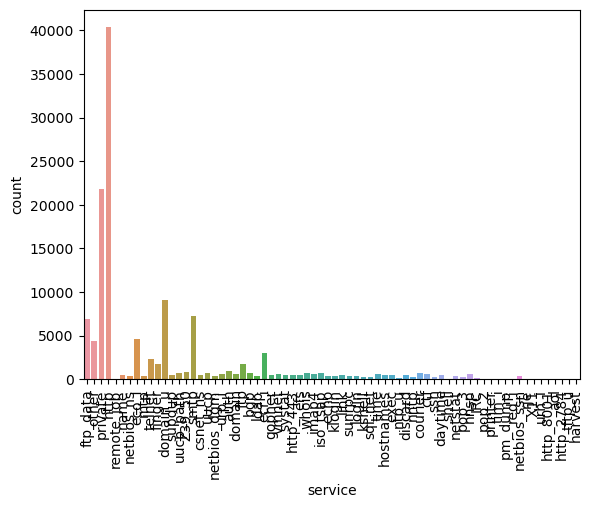

In [822]:
Categories = ['service','protocol_type','flag','attack_type']
ax = sns.countplot(x = data['service'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
data['service'].value_counts()




tcp     102689
udp      14993
icmp      8282
Name: protocol_type, dtype: int64

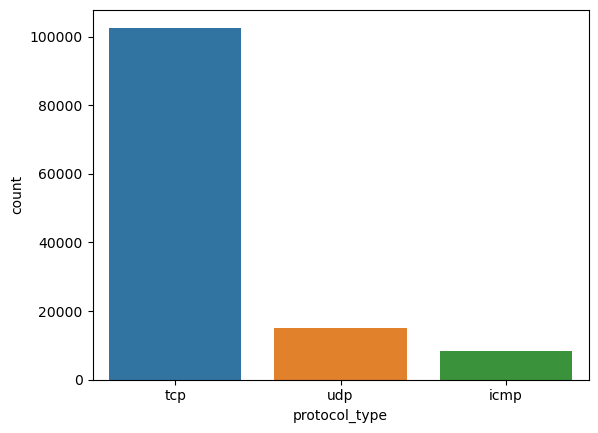

In [823]:
sns.countplot(x = data['protocol_type'])
data['protocol_type'].value_counts()

SF        74936
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

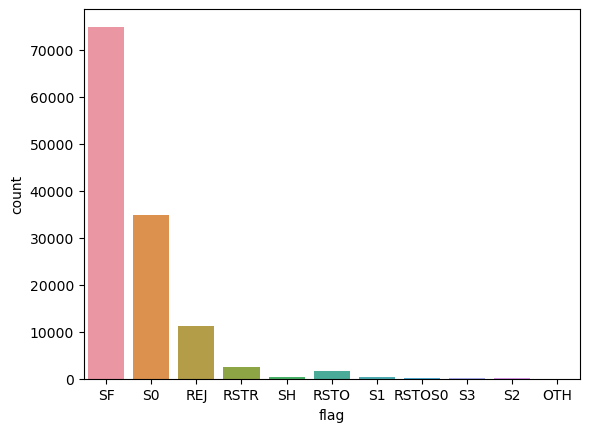

In [824]:
sns.countplot(x = data['flag'])
data['flag'].value_counts()

normal    67343
dos       45927
probe     11647
r2l         995
u2r          52
Name: attack_type, dtype: int64

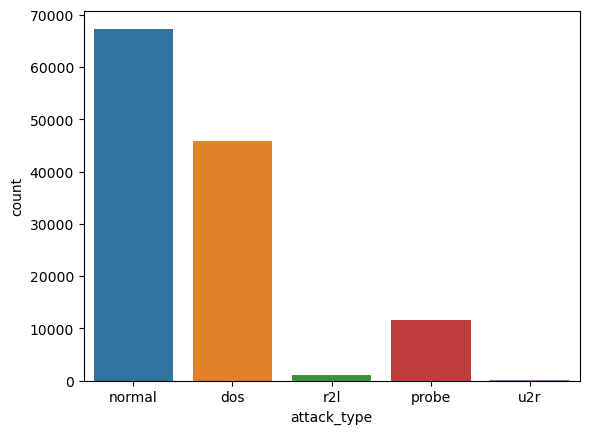

In [825]:
sns.countplot(x = data['attack_type'])
data['attack_type'].value_counts()

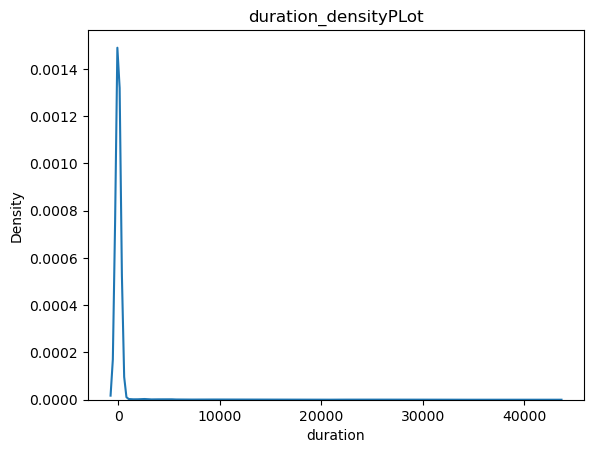

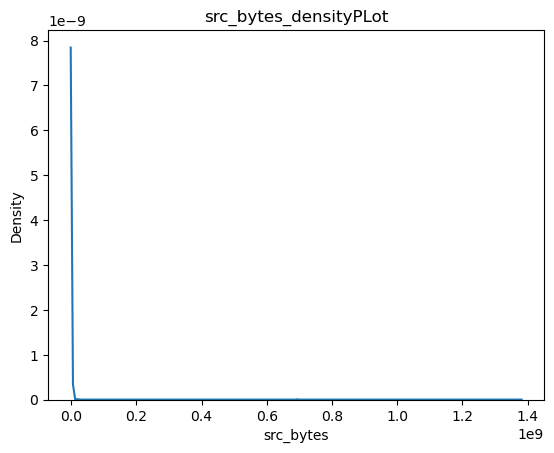

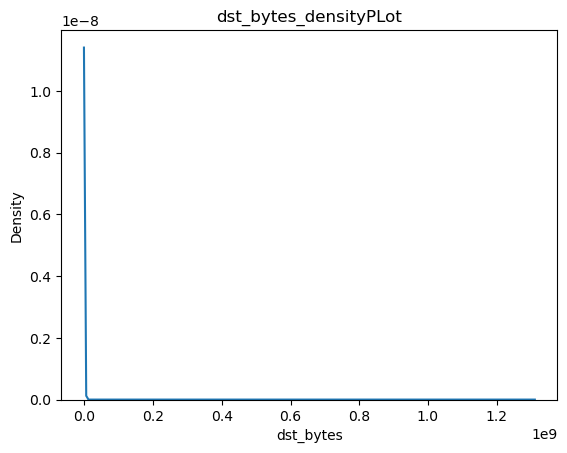

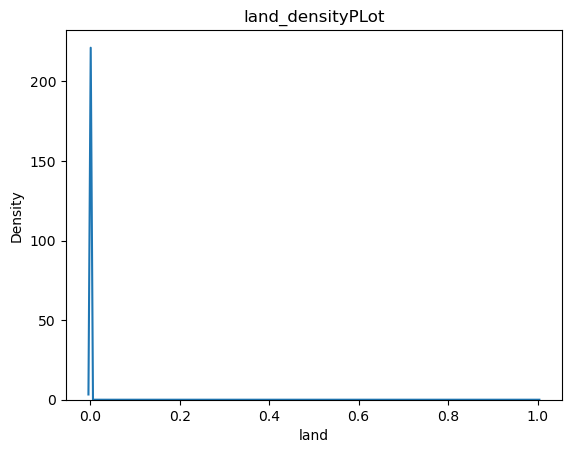

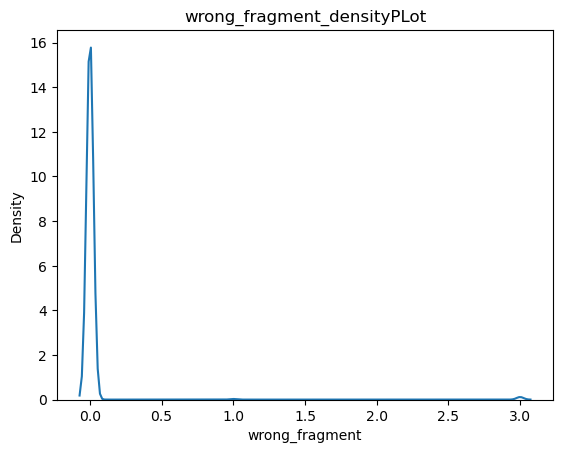

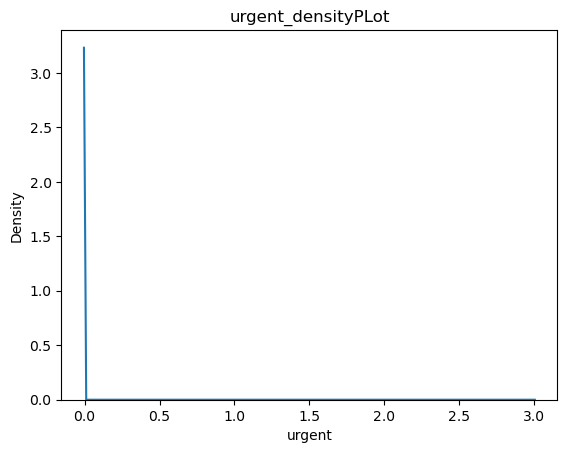

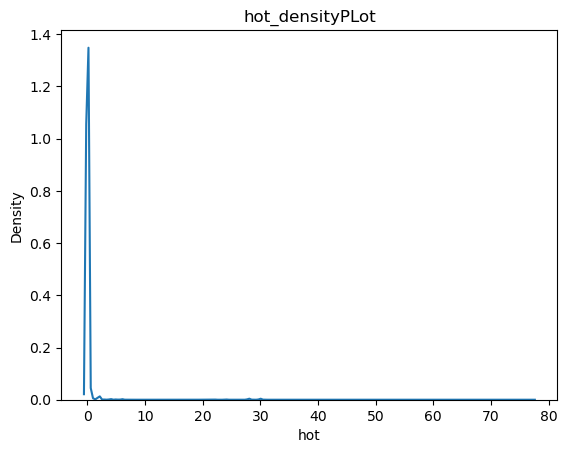

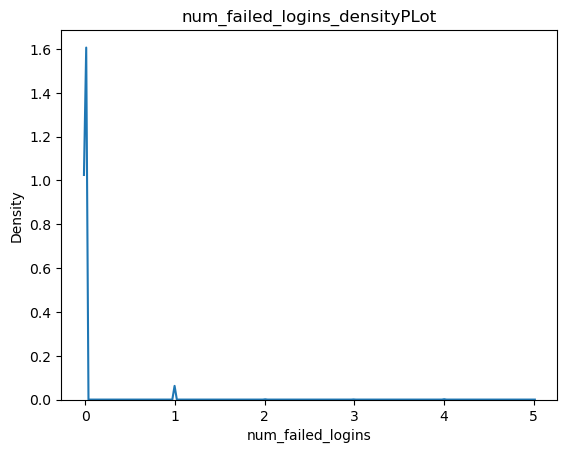

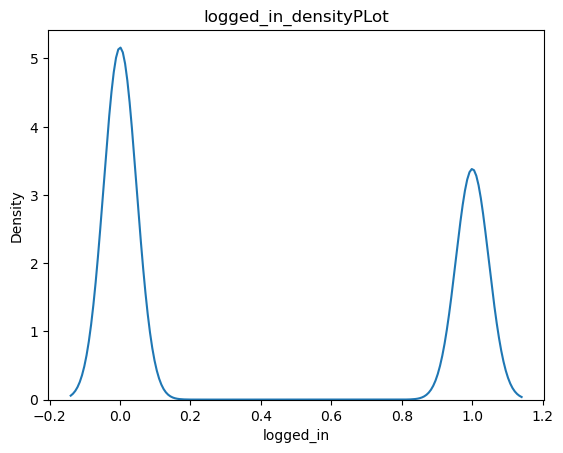

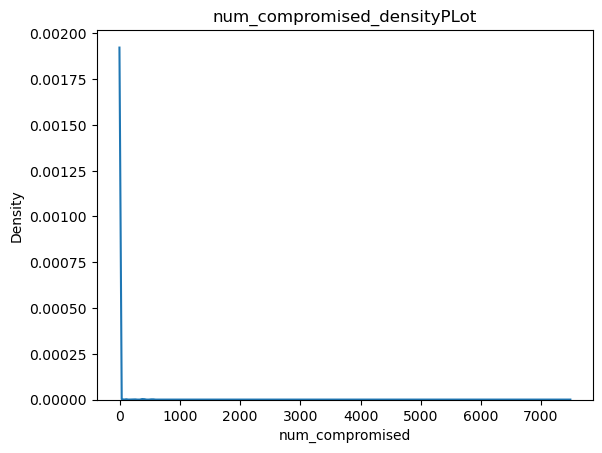

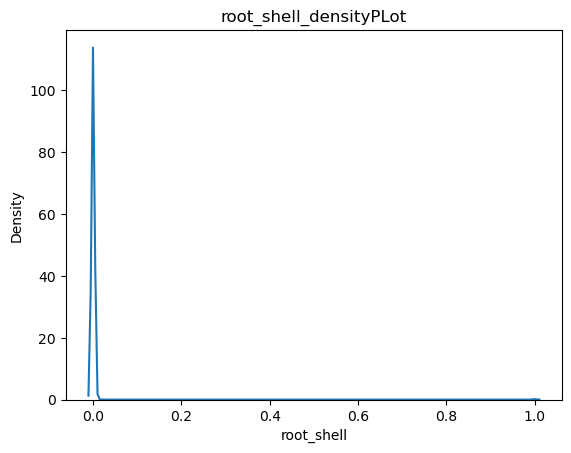

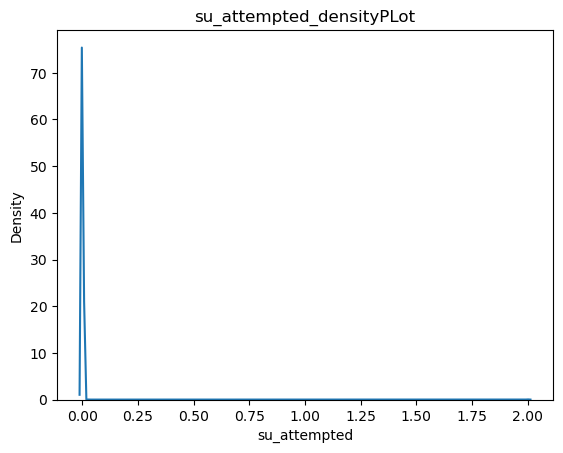

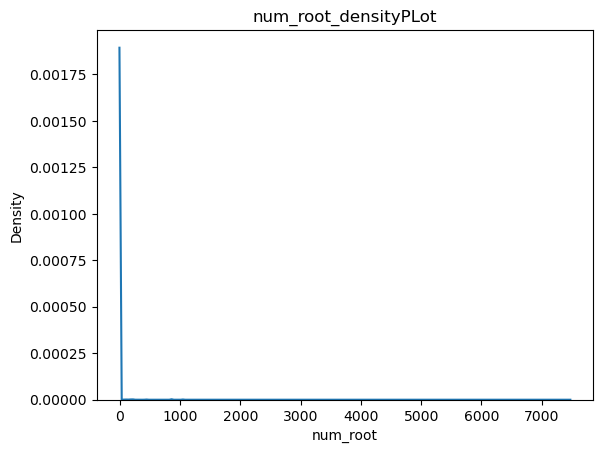

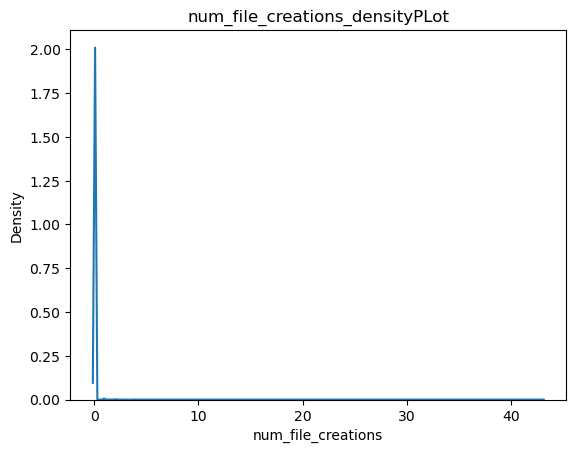

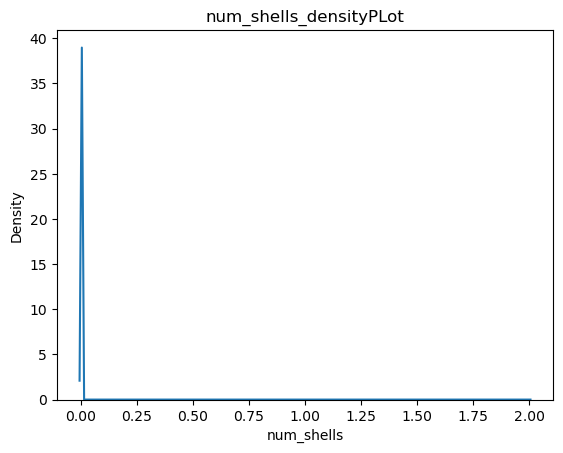

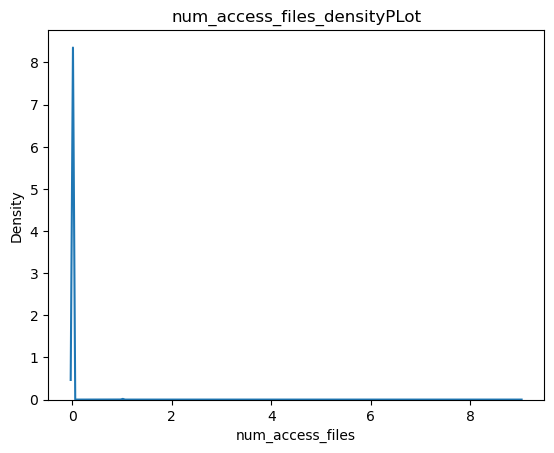

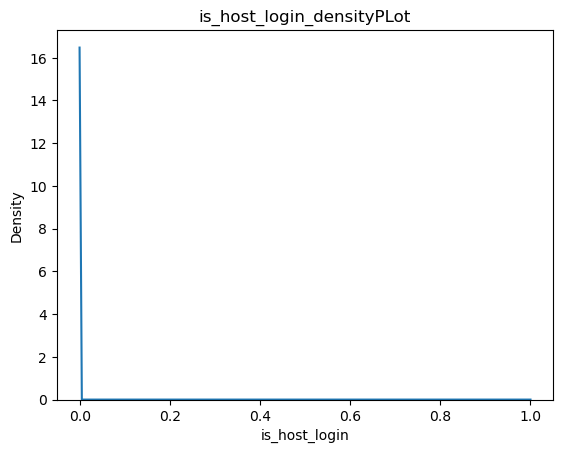

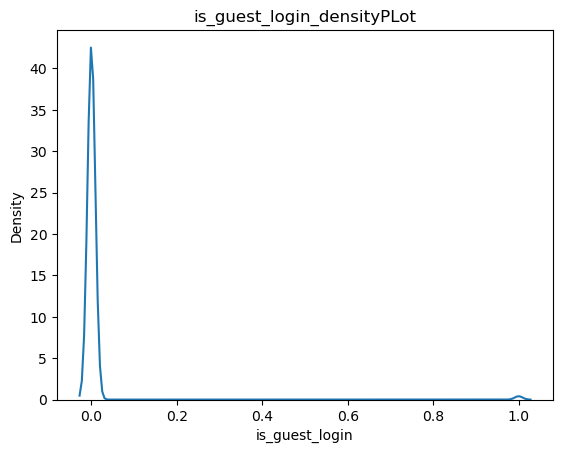

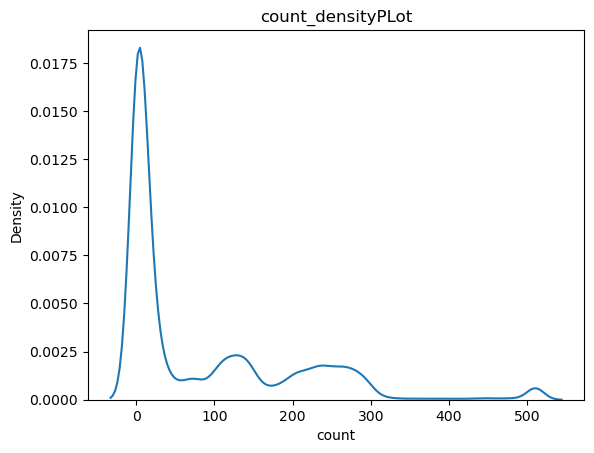

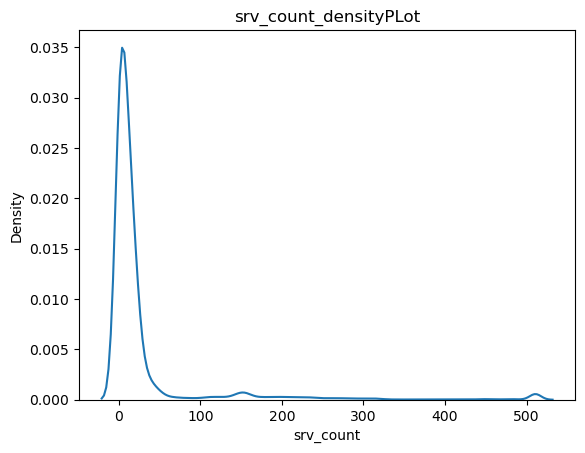

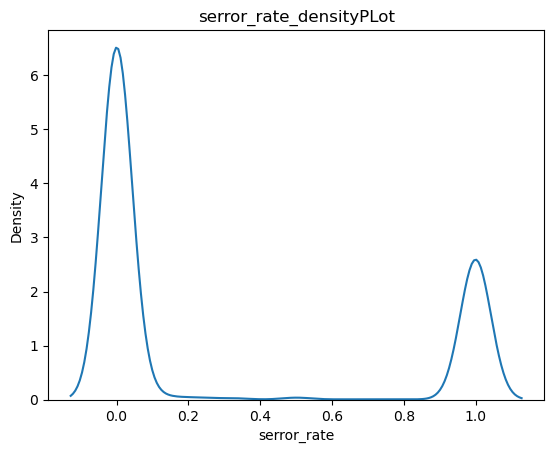

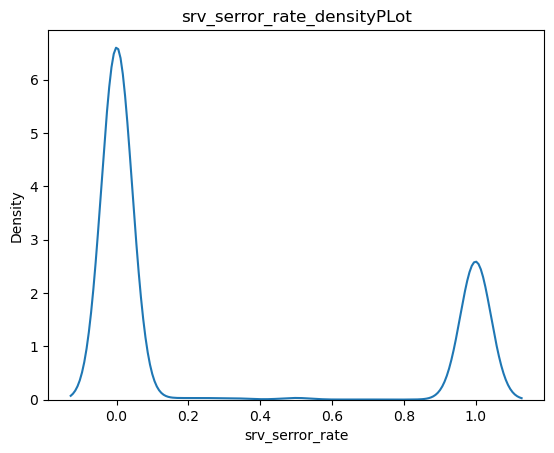

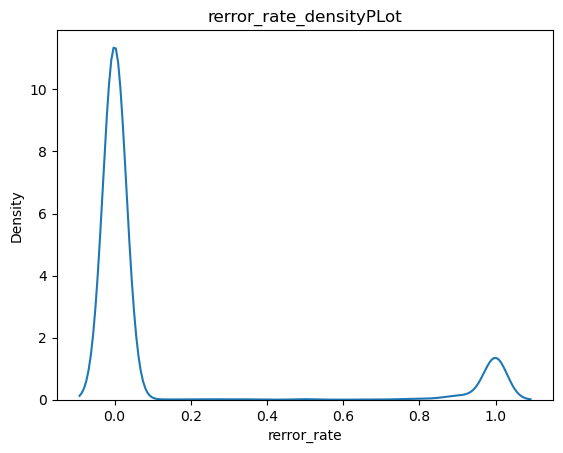

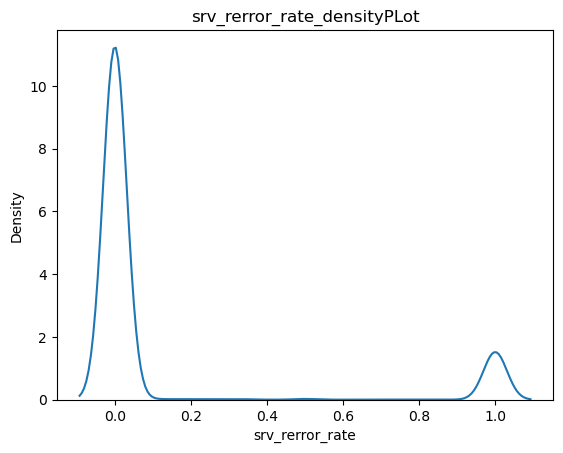

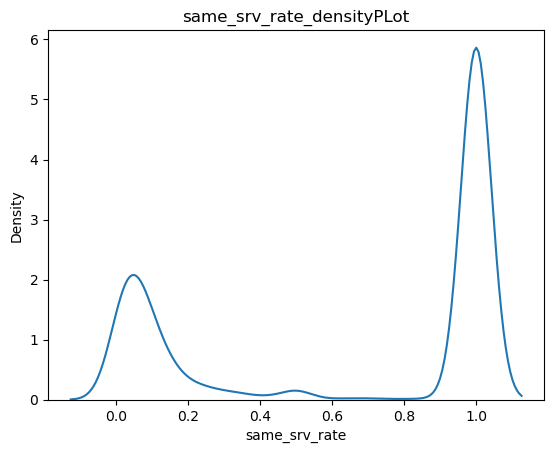

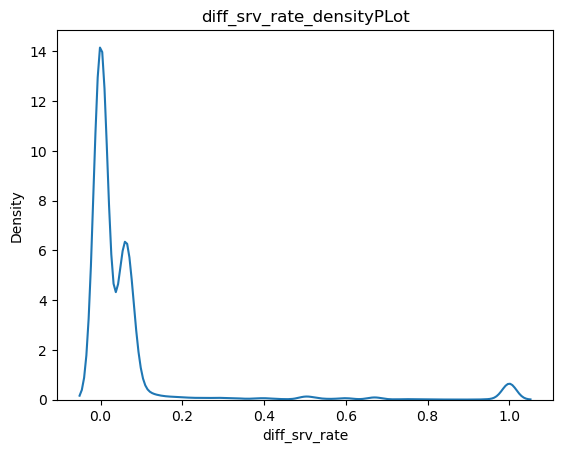

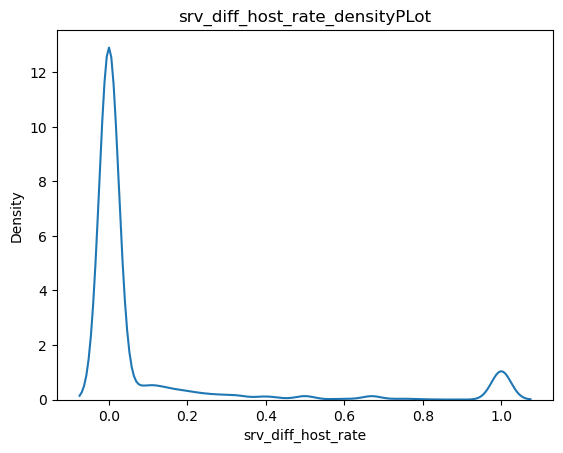

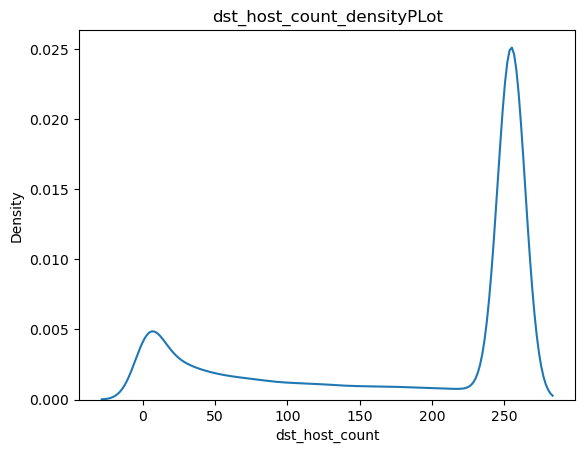

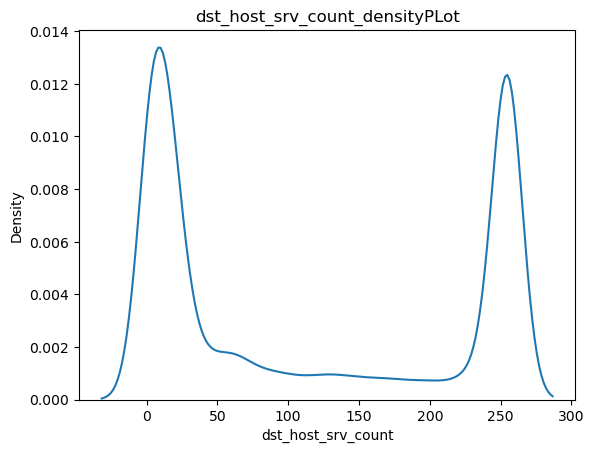

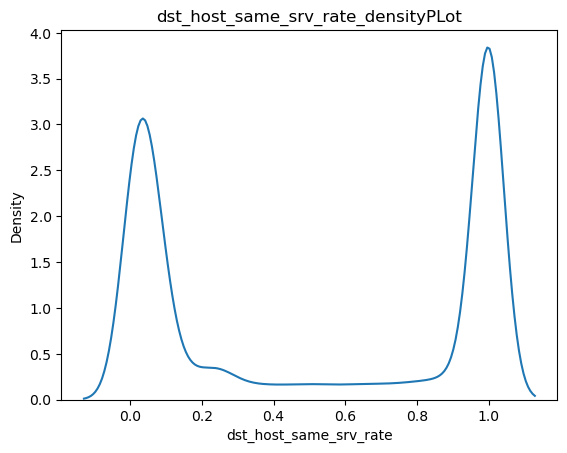

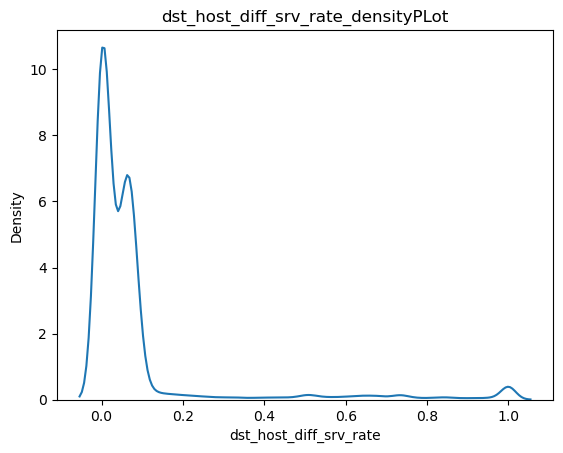

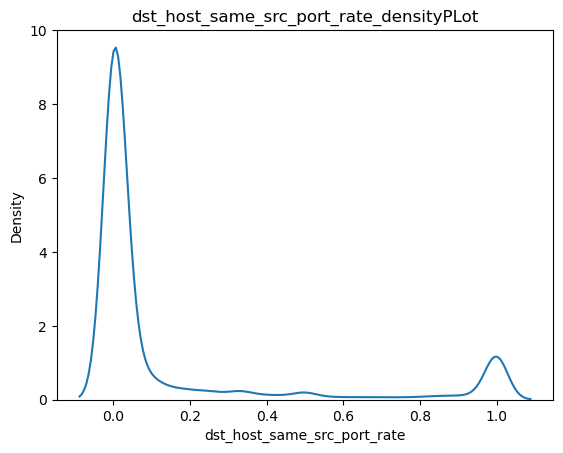

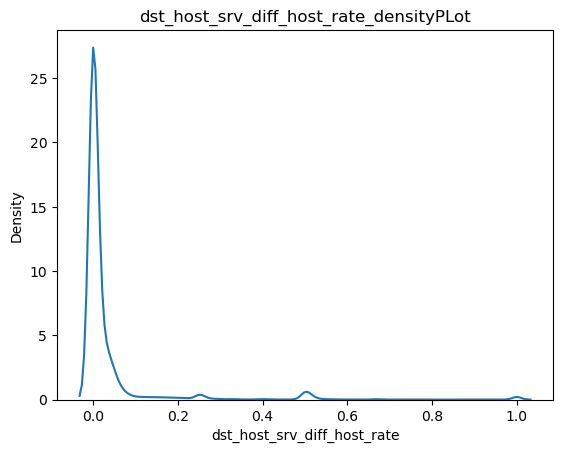

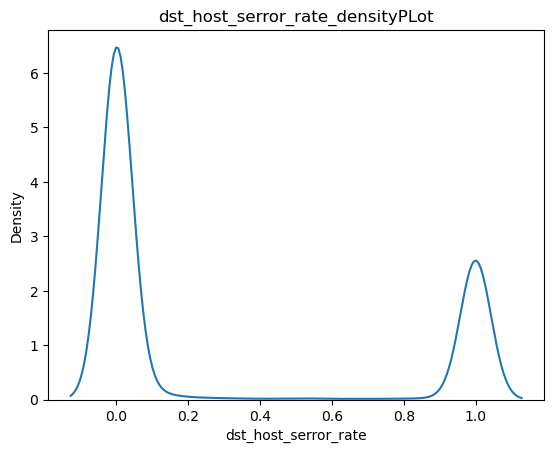

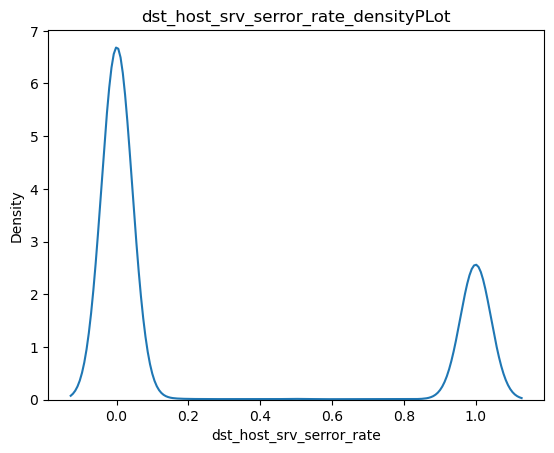

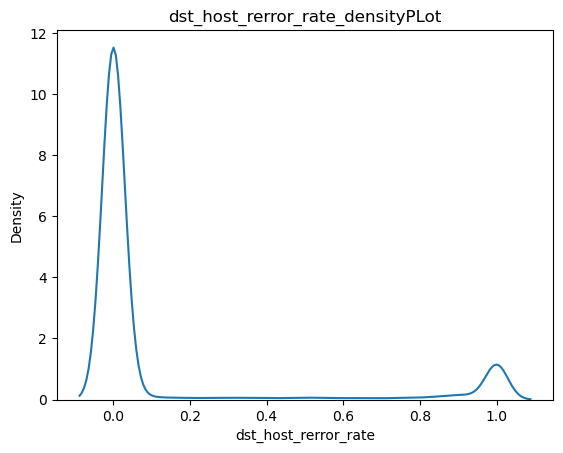

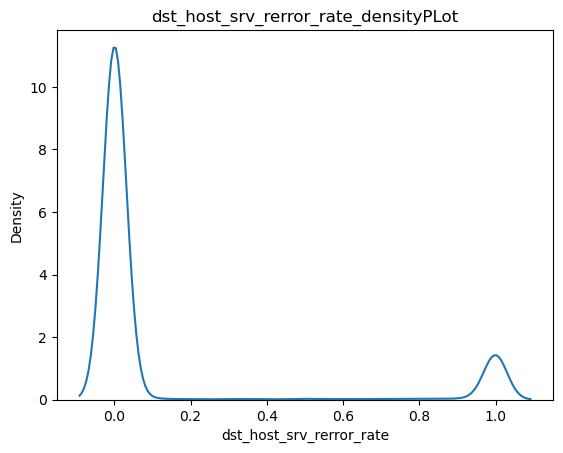

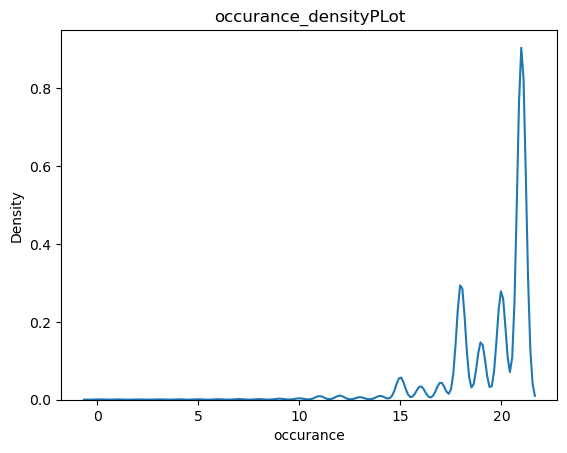

In [826]:
for col in data.columns:
    if data[col].dtype != object:
        sns.kdeplot(data[col])
        mp.ylabel('Density')
        mp.title(col + "_densityPLot")
        mp.show()

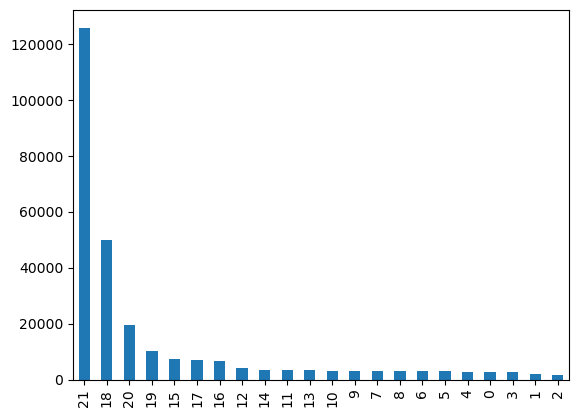

In [827]:
for col in data.columns:
    if data[col].dtype != object:
        data[col].value_counts().plot(kind="bar")

In [118]:
#Handling Outliers

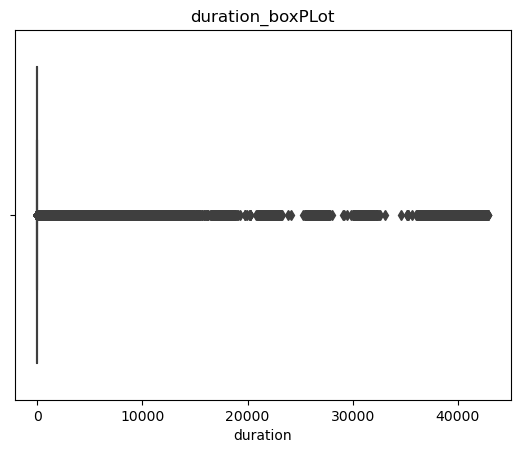

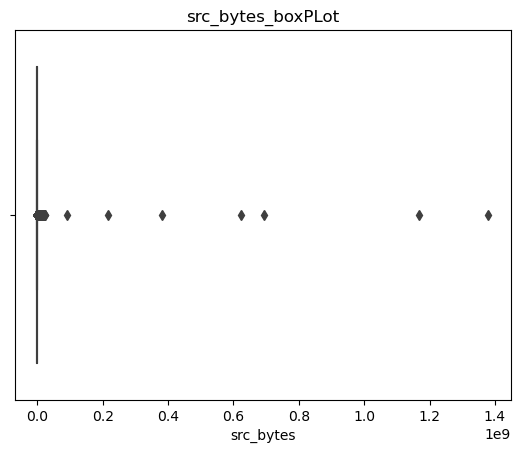

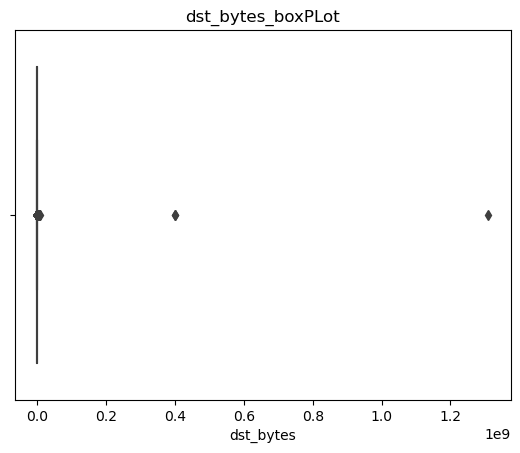

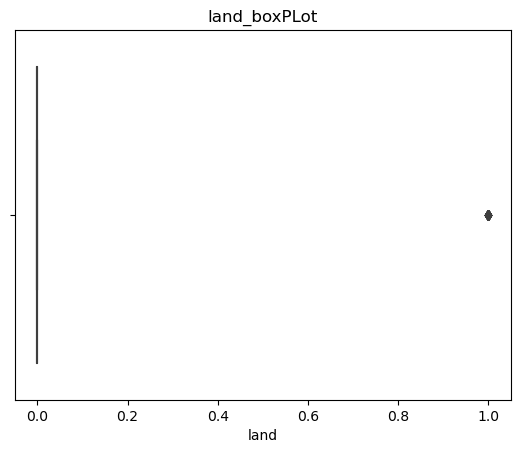

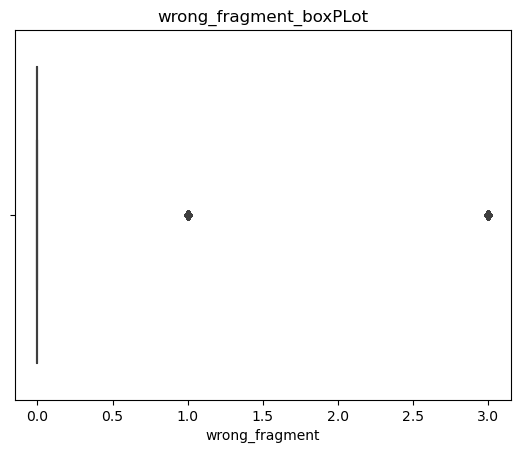

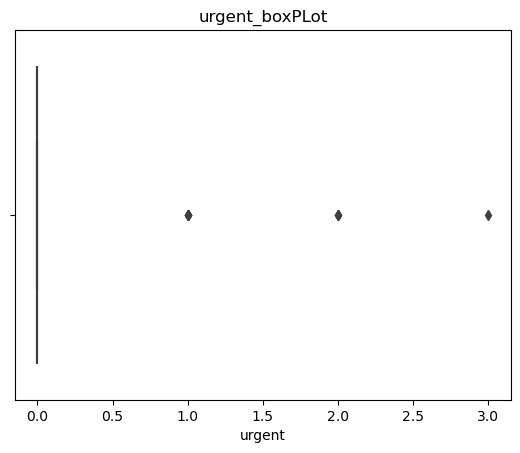

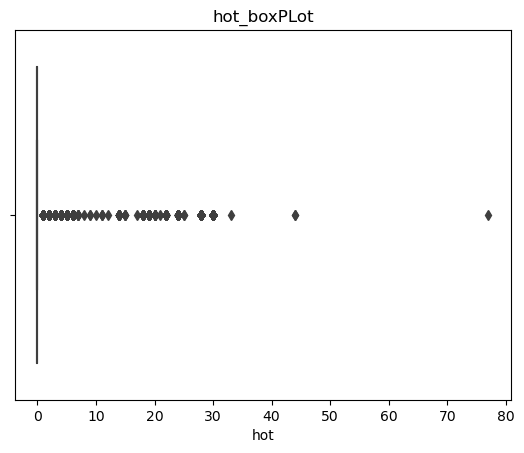

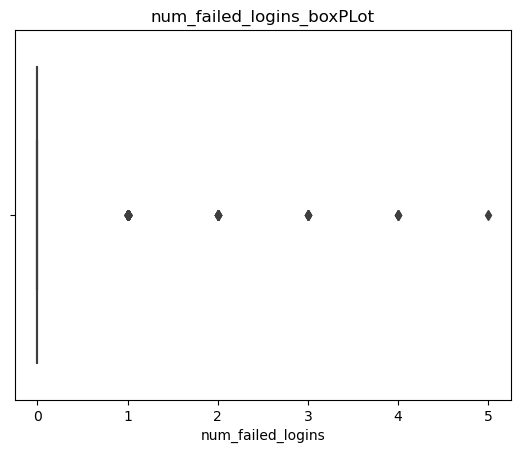

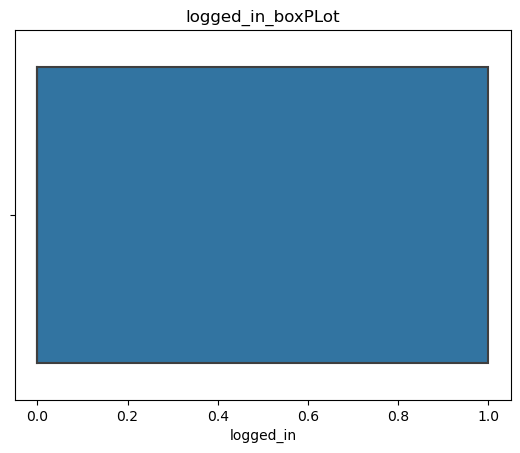

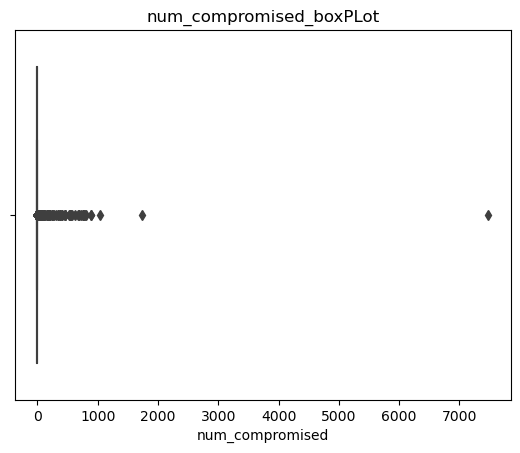

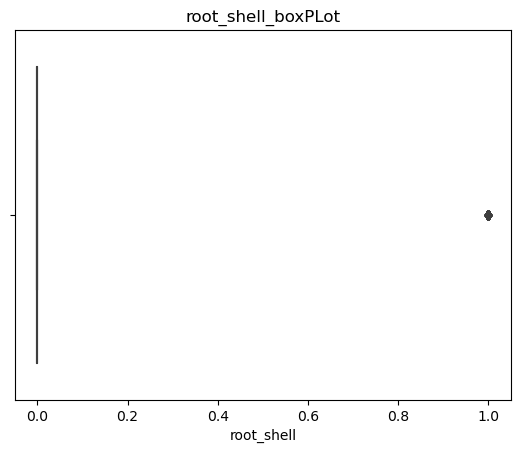

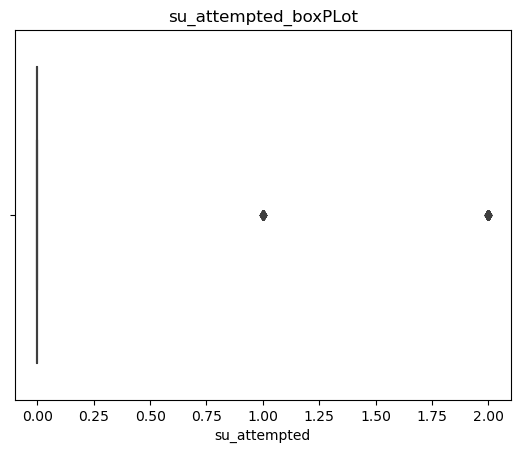

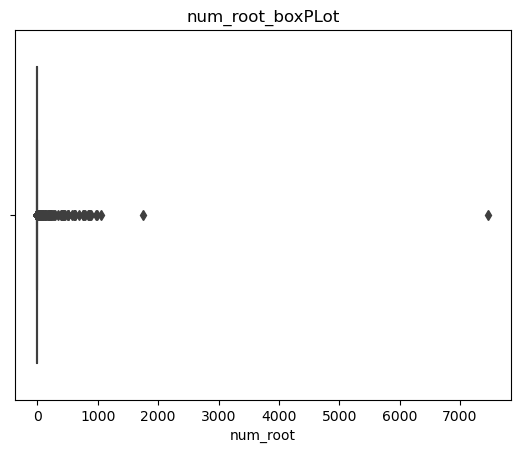

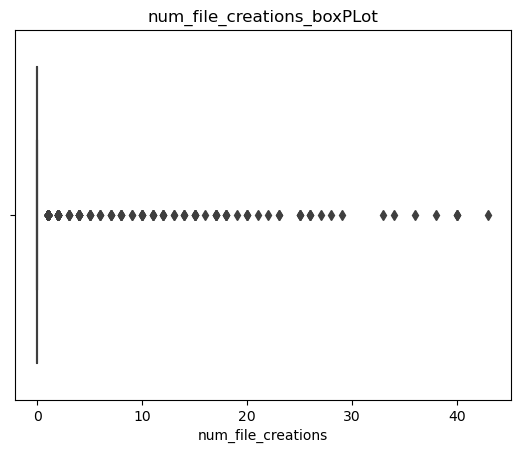

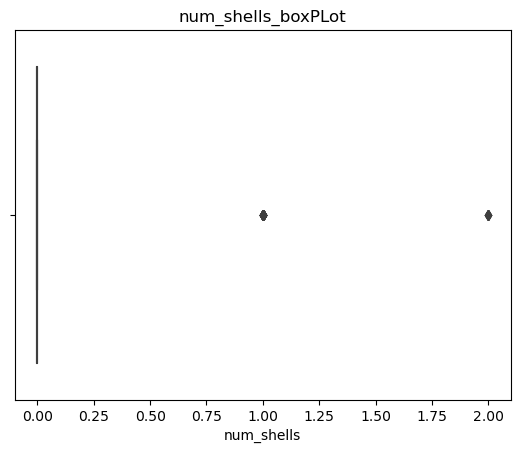

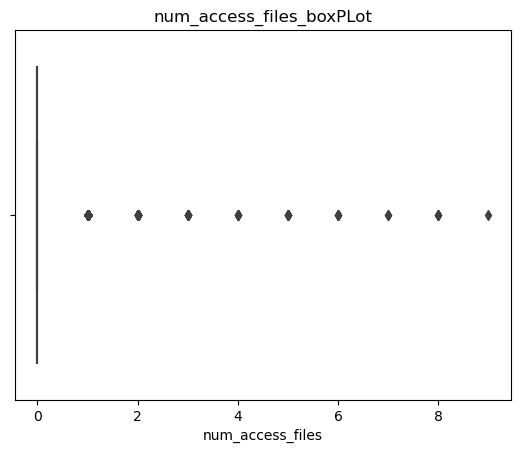

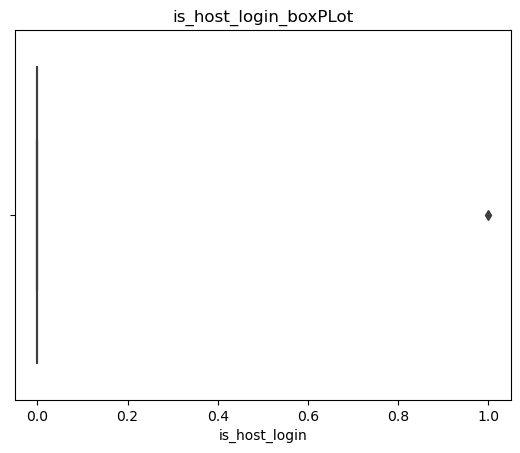

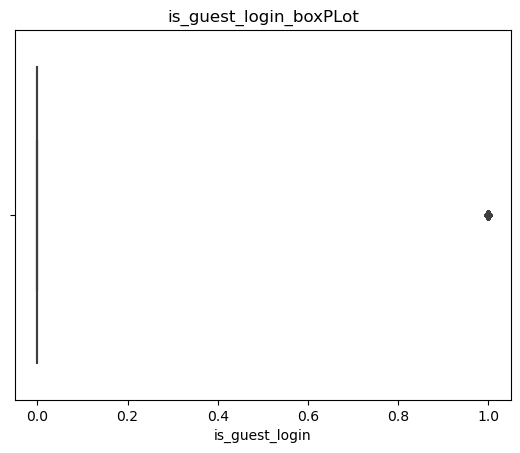

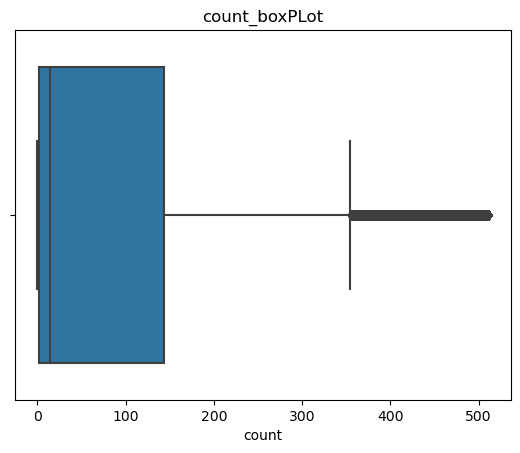

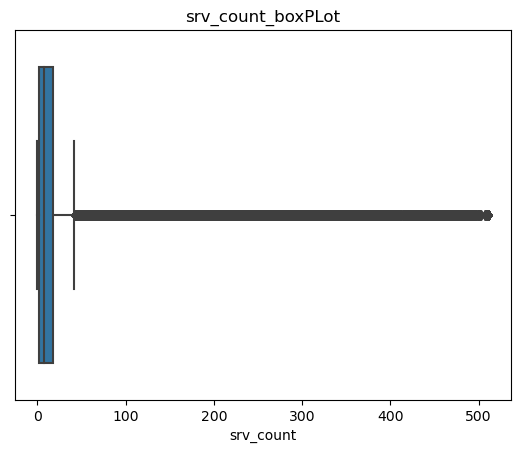

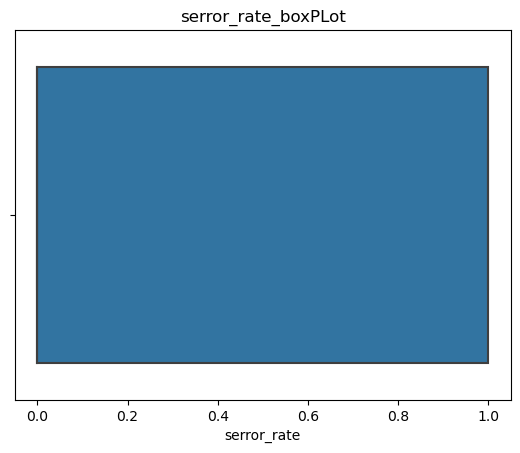

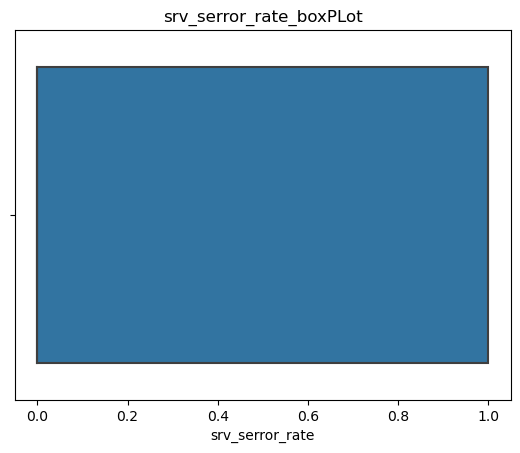

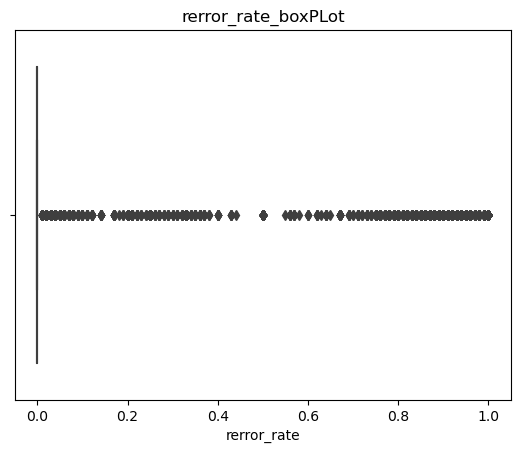

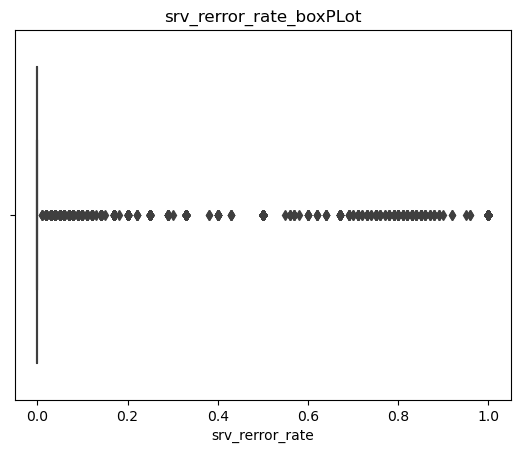

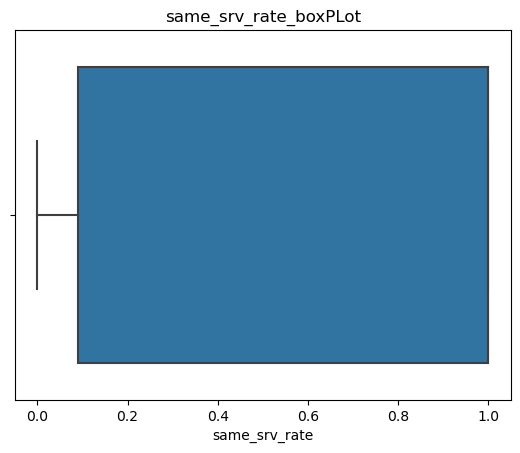

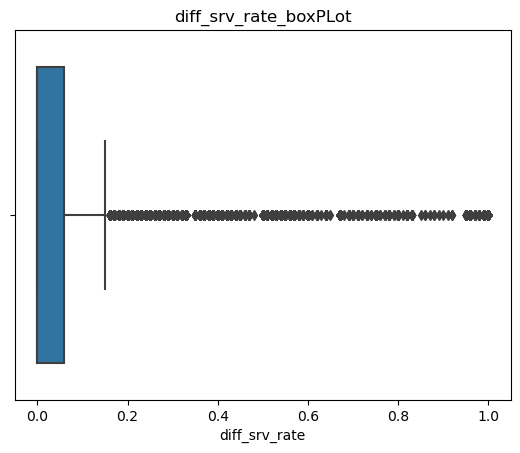

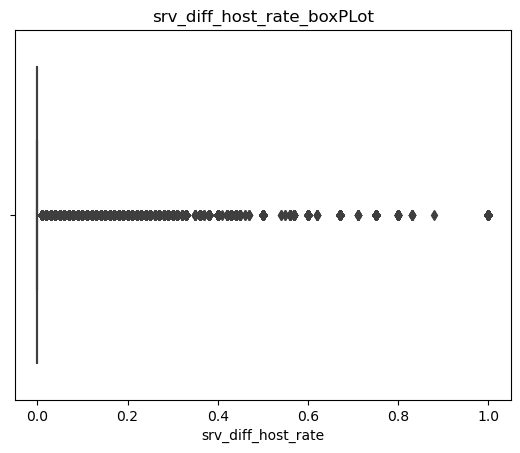

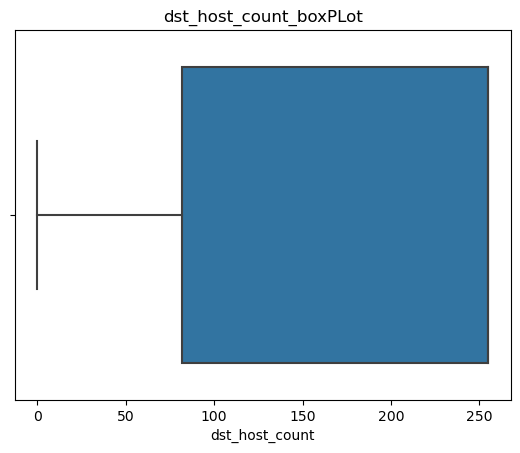

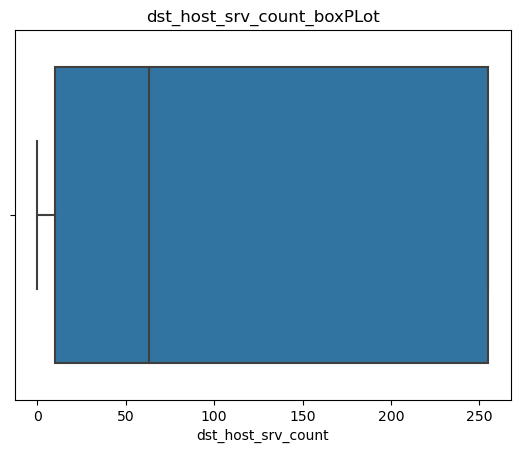

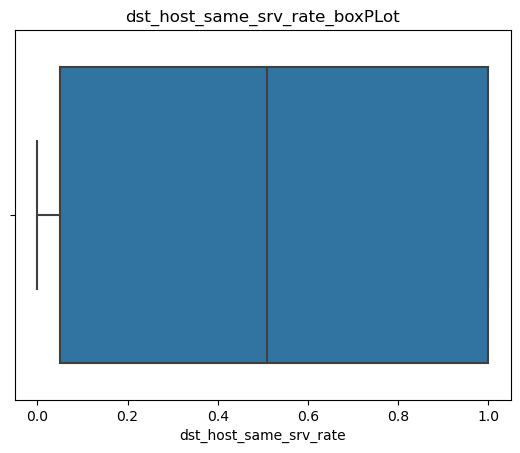

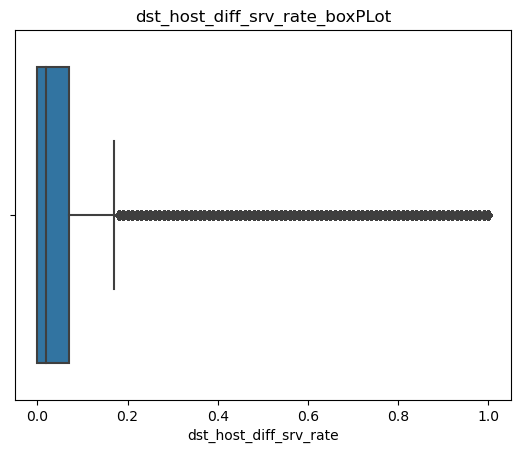

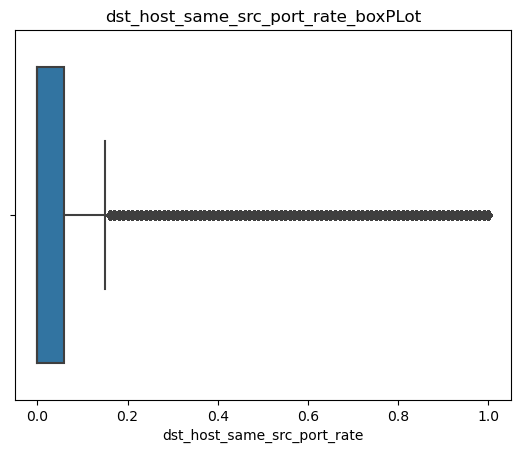

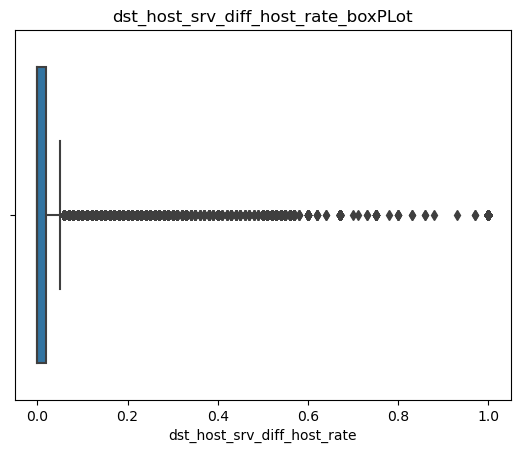

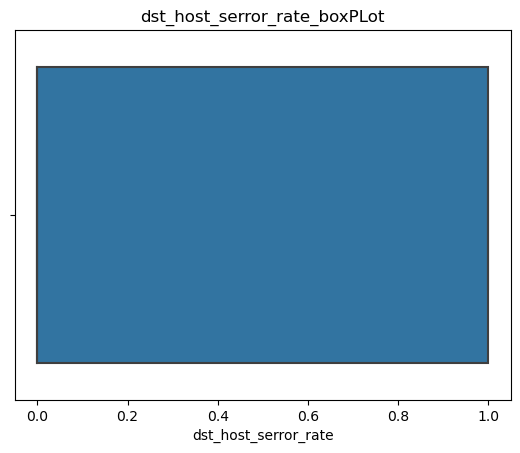

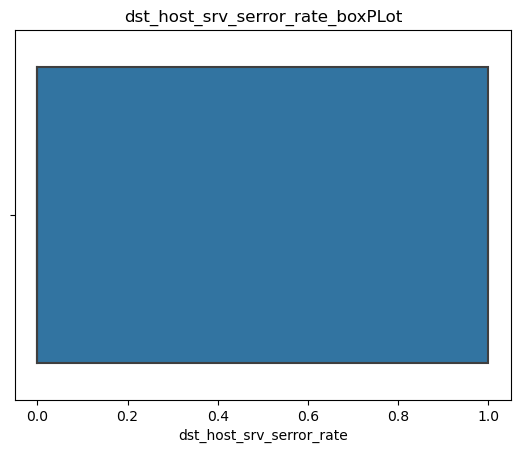

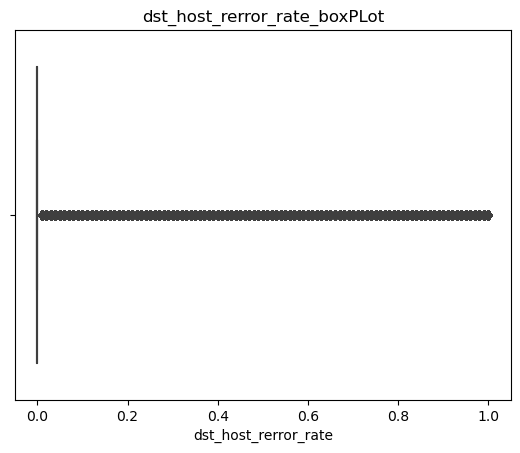

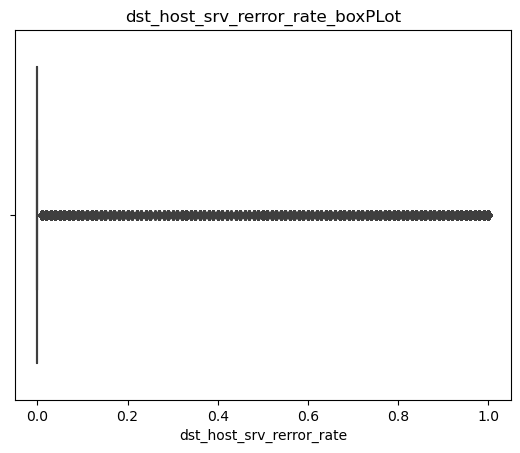

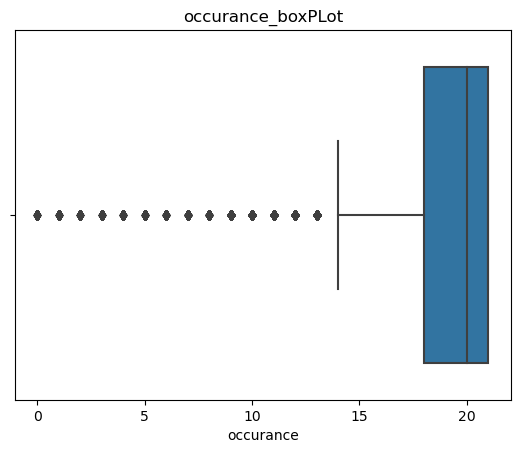

In [673]:

for col in data.columns:
    if data[col].dtype != object:
        sns.boxplot(x=data[col])
        mp.title(col + "_boxPLot")
        mp.show()

### Outliers were to be handled using IQR approach but as the outliers represent the cyber attacks footprints during the network trafficking we'll keep them in our dataset for now

In [33]:
#Bivariate Analysis

In [829]:
x = dataAfterNum.drop('attack_type',axis=1)
y = dataAfterNum['attack_type']

### checking statistics of all features before standardization

In [830]:

for col in x.select_dtypes(exclude='object').columns:
    mean = x[col].mean()
    median = x[col].median()
    mode = x[col].mode()[0]
    var = x[col].var()
    std = x[col].std()
    print("Feature:" + str(col))
    print("Mean:" + str(mean))
    print("Median:" + str(median))
    print("Mode:" + str(mode))
    print("Variance: " + str(var))
    print("Standard Deviation:" + str(std))



Feature:duration
Mean:287.16516623797276
Median:0.0
Mode:0
Variance: 6783978.785773607
Standard Deviation:2604.607222936619
Feature:protocol_type
Mean:1.053277126798133
Median:1.0
Mode:1
Variance: 0.18193800720904185
Standard Deviation:0.4265419172942348
Feature:service
Mean:31.227660283890636
Median:24.0
Mode:24
Variance: 267.20629380104646
Standard Deviation:16.346445907323293
Feature:flag
Mean:6.979851386110317
Median:9.0
Mode:9
Variance: 7.232908574889431
Standard Deviation:2.6894067328854203
Feature:src_bytes
Mean:45569.99812644882
Median:44.0
Mode:0
Variance: 34463250244731.562
Standard Deviation:5870540.881786921
Feature:dst_bytes
Mean:19780.527619002256
Median:0.0
Mode:0
Variance: 16171760942942.4
Standard Deviation:4021412.8043440655
Feature:land
Mean:0.00019846940395668603
Median:0.0
Mode:0
Variance: 0.00019843158915664575
Standard Deviation:0.014086574784405389
Feature:wrong_fragment
Mean:0.02268902226032835
Median:0.0
Mode:0
Variance: 0.06428200959307571
Standard Deviation:

# standardize it now

In [831]:
from sklearn import preprocessing
standard = preprocessing.scale(x)
standardized_x = pd.DataFrame(standard, columns= x.columns)
for col in standardized_x.select_dtypes(exclude='object').columns:
    mean = standardized_x[col].mean()
    median = standardized_x[col].median()
    mode = standardized_x[col].mode()[0]
    var = standardized_x[col].var()
    std = standardized_x[col].std()
    print("Feature:" + str(col))
    print("Mean:" + str(mean))
    print("Median:" + str(median))
    print("Mode:" + str(mode))
    print("Variance: " + str(var))
    print("Standard Deviation:" + str(std))

Feature:duration
Mean:1.3355800804744976e-15
Median:-0.11025320961468675
Mode:-0.11025320961468675
Variance: 1.0000079388418461
Standard Deviation:1.000003969413045
Feature:protocol_type
Mean:-8.049674402146335e-16
Median:-0.12490528156052198
Mode:-0.12490528156052198
Variance: 1.0000079388378915
Standard Deviation:1.0000039694110676
Feature:service
Mean:-1.673879527747602e-15
Median:-0.4421566017732566
Mode:-0.4421566017732566
Variance: 1.0000079388397083
Standard Deviation:1.000003969411976
Feature:flag
Mean:1.089203845580937e-15
Median:0.7511532591891754
Mode:0.7511532591891754
Variance: 1.0000079388383938
Standard Deviation:1.0000039694113187
Feature:src_bytes
Mean:-3.863942438742782e-16
Median:-0.0077550228768770895
Mode:-0.007762517957064785
Variance: 1.0000079388395715
Standard Deviation:1.0000039694119076
Feature:dst_bytes
Mean:-1.2434511068976707e-15
Median:-0.004918820100913004
Mode:-0.004918820100913004
Variance: 1.00000793883768
Standard Deviation:1.000003969410962
Feature:

### Split in Train and Test and perform Correlation analysis

### Non standardized Train and Test

In [833]:
# Non standardized Train and Test
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state =42)
X_train.shape, X_test.shape

((88174, 41), (37790, 41))

# standardized Train and Test

In [834]:
XSt_train, XSt_test, ySt_train, ySt_test =train_test_split(standardized_x,y,test_size=0.3,random_state =42)
XSt_train.shape, X_test.shape

((88174, 41), (37790, 41))

# Correlation Analysis
# Only perform on Standardized Training then replicate the results to test and standardized dataset

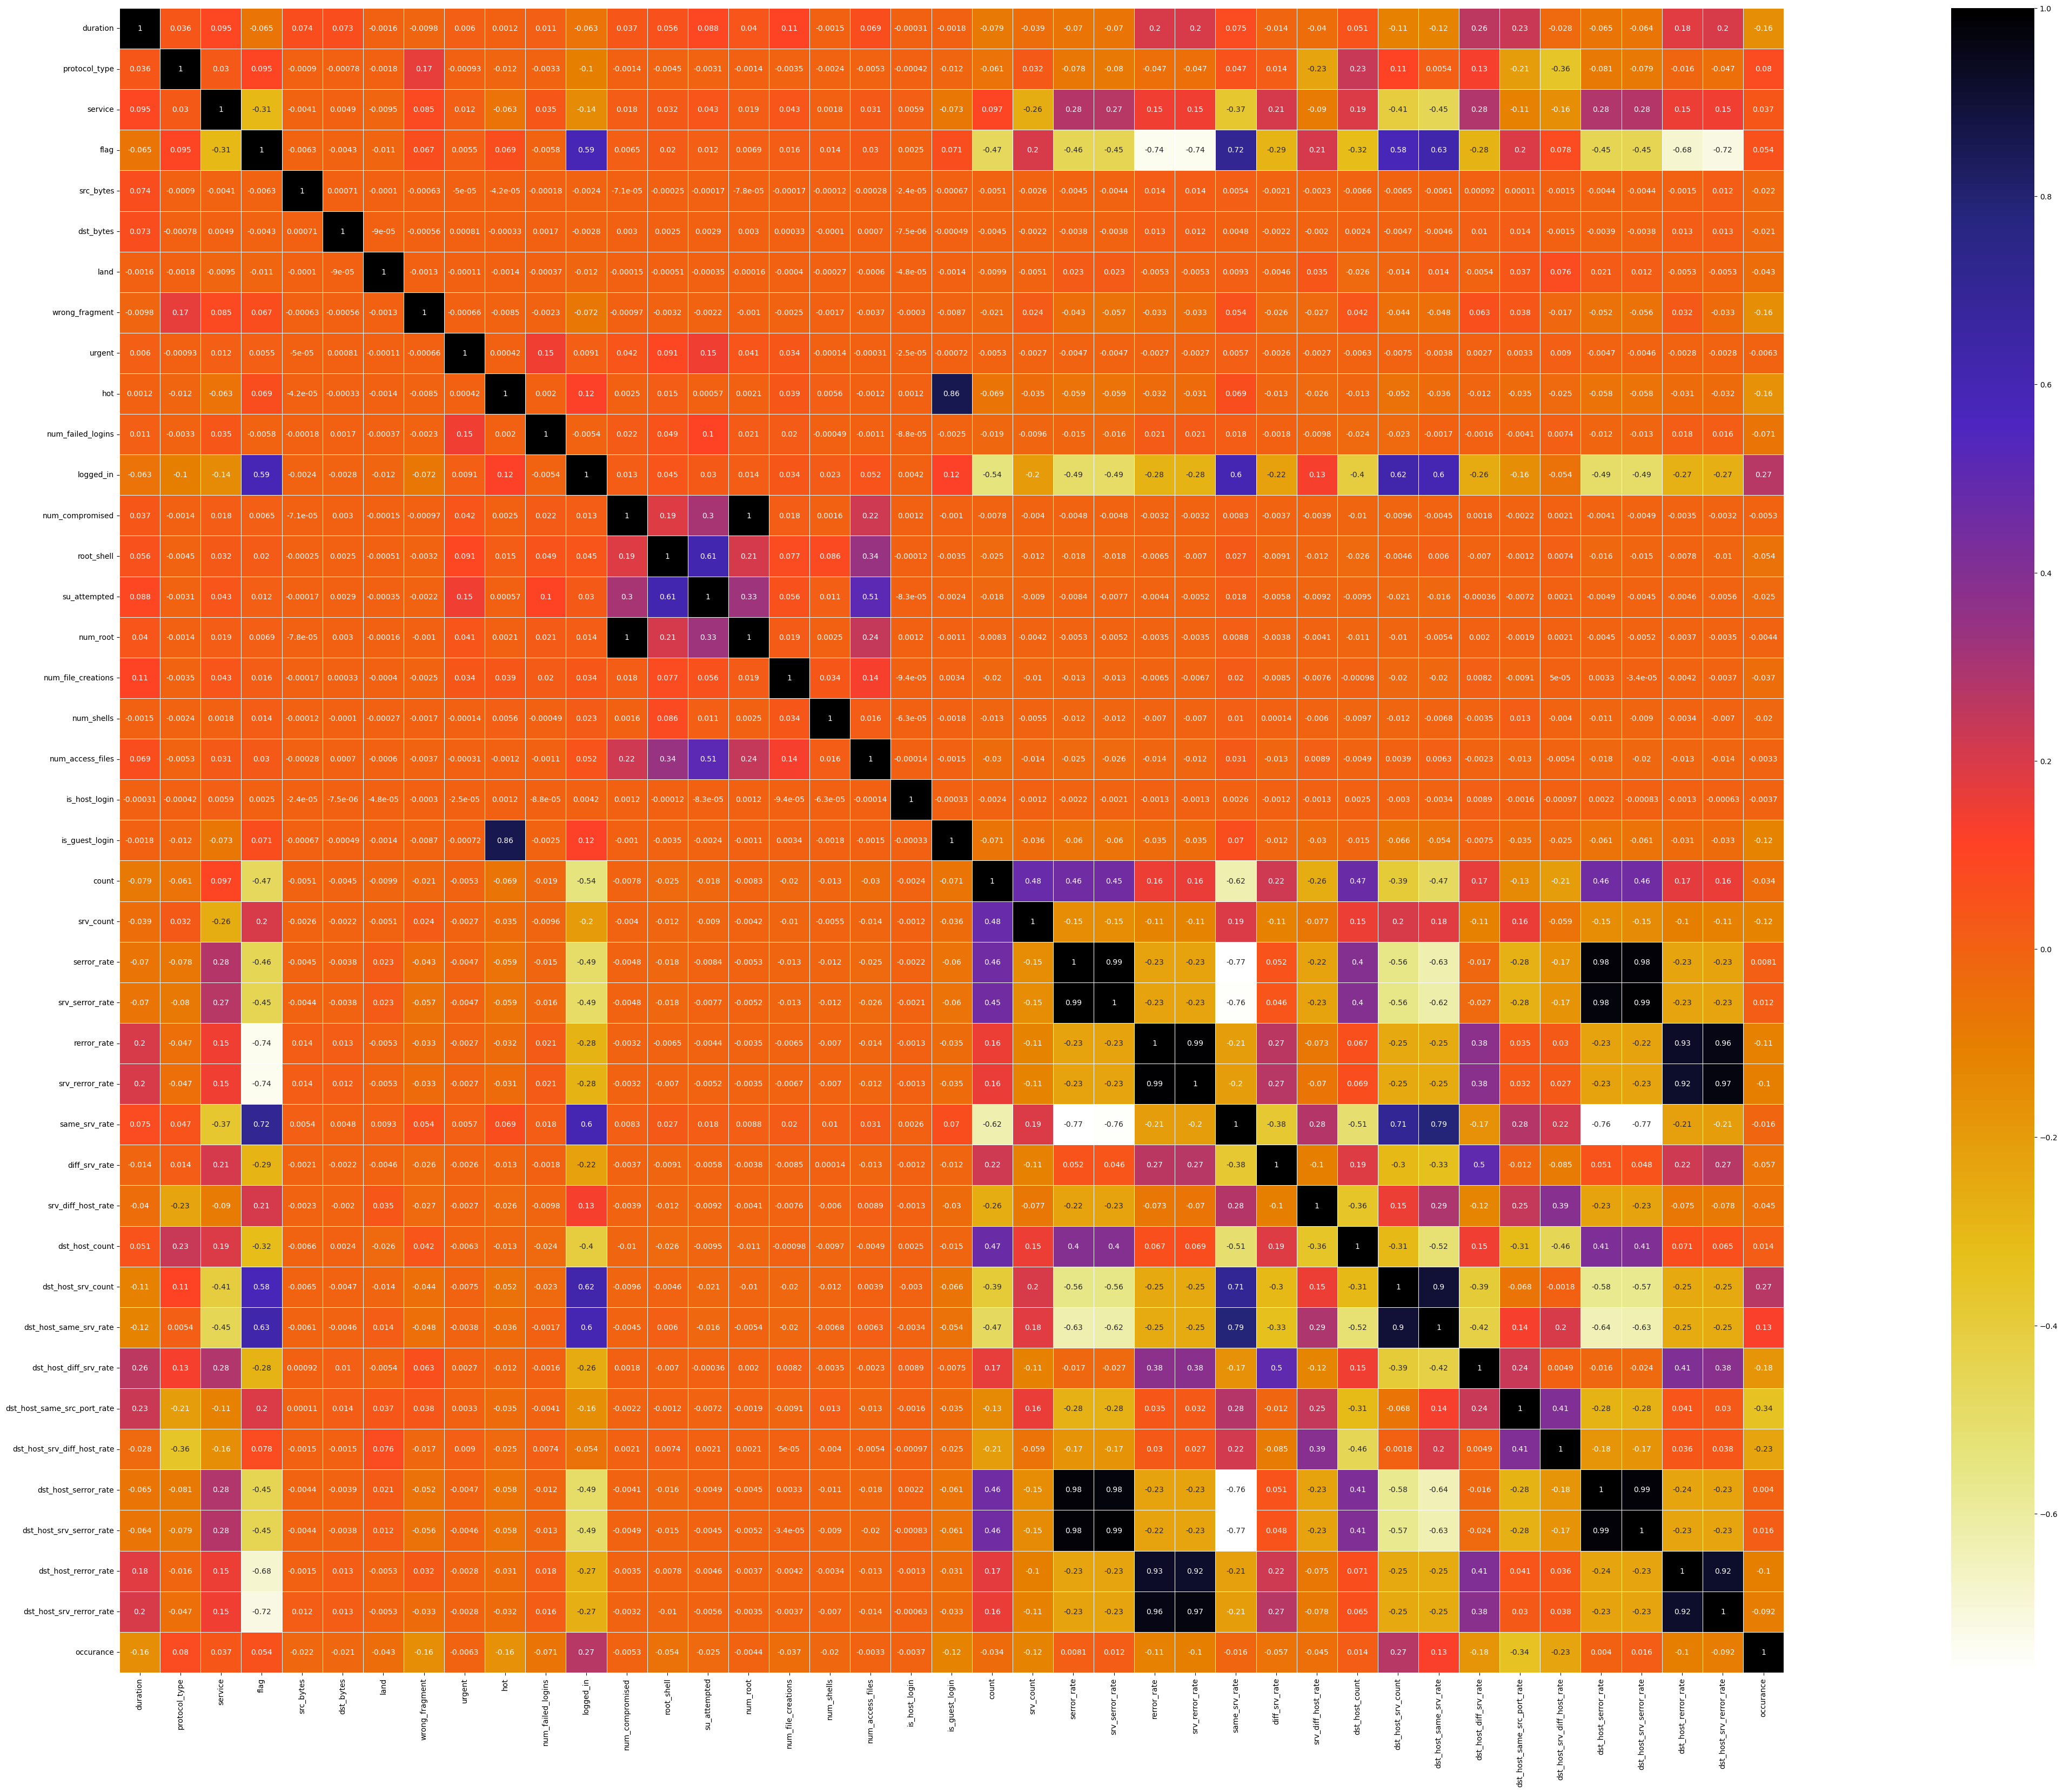

In [679]:

mp.figure(figsize=(80,40))
corr = XSt_train.corr()
sns.heatmap(corr, annot= True,cmap = mp.cm.CMRmap_r,square=True, linewidth =.5)
mp.show()

In [835]:
corr

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
duration,1.000000,0.036310,0.094716,-0.064776,0.073623,0.073371,-0.001570,-0.009834,0.006047,0.001203,...,-0.109376,-0.116058,0.256514,0.230023,-0.027892,-0.064678,-0.064264,0.177789,0.201116,-0.159491
protocol_type,0.036310,1.000000,0.030180,0.094914,-0.000901,-0.000783,-0.001803,0.170232,-0.000928,-0.011999,...,0.105159,0.005419,0.130960,-0.207532,-0.358685,-0.080835,-0.079211,-0.015622,-0.047223,0.079511
service,0.094716,0.030180,1.000000,-0.305395,-0.004112,0.004909,-0.009519,0.084780,0.011634,-0.063489,...,-0.408192,-0.453285,0.283662,-0.109675,-0.160007,0.281639,0.278128,0.152496,0.148726,0.037012
flag,-0.064776,0.094914,-0.305395,1.000000,-0.006345,-0.004253,-0.010558,0.067309,0.005530,0.068658,...,0.582797,0.629775,-0.283164,0.195015,0.078099,-0.447492,-0.447359,-0.680528,-0.715588,0.053778
src_bytes,0.073623,-0.000901,-0.004112,-0.006345,1.000000,0.000705,-0.000101,-0.000632,-0.000050,-0.000042,...,-0.006492,-0.006141,0.000916,0.000107,-0.001464,-0.004435,-0.004390,-0.001498,0.012445,-0.022355
dst_bytes,0.073371,-0.000783,0.004909,-0.004253,0.000705,1.000000,-0.000090,-0.000563,0.000808,-0.000332,...,-0.004694,-0.004618,0.010085,0.013679,-0.001502,-0.003861,-0.003777,0.013255,0.012681,-0.021363
land,-0.001570,-0.001803,-0.009519,-0.010558,-0.000101,-0.000090,1.000000,-0.001279,-0.000105,-0.001359,...,-0.014361,0.013608,-0.005427,0.037081,0.076202,0.021227,0.012213,-0.005334,-0.005348,-0.043115
wrong_fragment,-0.009834,0.170232,0.084780,0.067309,-0.000632,-0.000563,-0.001279,1.000000,-0.000658,-0.008509,...,-0.044428,-0.048117,0.063318,0.038192,-0.016534,-0.051726,-0.056173,0.032015,-0.033489,-0.159130
urgent,0.006047,-0.000928,0.011634,0.005530,-0.000050,0.000808,-0.000105,-0.000658,1.000000,0.000424,...,-0.007465,-0.003782,0.002679,0.003334,0.008988,-0.004722,-0.004615,-0.002838,-0.002751,-0.006340
hot,0.001203,-0.011999,-0.063489,0.068658,-0.000042,-0.000332,-0.001359,-0.008509,0.000424,1.000000,...,-0.051933,-0.036160,-0.012068,-0.035201,-0.024935,-0.058299,-0.058188,-0.030594,-0.031520,-0.162454


### find correlation between features and target and store in dictionary

In [836]:
corr_with_target_dict = {col: dataAfterNum[col].corr(dataAfterNum['attack_type']) for col in dataAfterNum.columns if col != 'attack_type'}
corr_with_target_dict

{'duration': 0.161729785312615,
 'protocol_type': 0.03456592421499085,
 'service': -0.1687977550331768,
 'flag': 0.40815160726465427,
 'src_bytes': 0.01348486097820332,
 'dst_bytes': 0.00876438415930925,
 'land': -0.010020247574041864,
 'wrong_fragment': -0.10197680598355287,
 'urgent': 0.010627285203219239,
 'hot': 0.12178924838108413,
 'num_failed_logins': 0.042491455959643036,
 'logged_in': 0.3427110363910454,
 'num_compromised': 0.004281633278947893,
 'root_shell': 0.04416495017287085,
 'su_attempted': 0.010074782782114659,
 'num_root': 0.005008774841517342,
 'num_file_creations': 0.015562546940128881,
 'num_shells': 0.023140614311303282,
 'num_access_files': 0.01889838785982197,
 'is_host_login': 0.0010995885227633119,
 'is_guest_login': 0.11687848112845987,
 'count': -0.48517675858969816,
 'srv_count': -0.07957367654301359,
 'serror_rate': -0.6708534614802127,
 'srv_serror_rate': -0.6717053236170292,
 'rerror_rate': 0.07849391353357119,
 'srv_rerror_rate': 0.08085645215273236,
 '

### correlation function that will take dataset and threshold and return the features to be removed

In [837]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    less_corr_with_target = {}  #will keep less correlated feature with target and remove it
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                if corr_with_target_dict[corr_matrix.columns[i]] < corr_with_target_dict[corr_matrix.columns[j]]:
                     colname = corr_matrix.columns[i]  # getting the name of column that is less correlated with target
                else:
                    colname = corr_matrix.columns[i]
                    
                col_corr.add(colname)
    return col_corr

    

### for standardized

In [838]:

corr_features = correlation(XSt_train, 0.92)
len(set(corr_features))

7

### for non standardized

In [684]:

corrs_features = correlation(X_train, 0.92)
len(set(corrs_features))

7

### To be removed standardized vs nonstandardized

In [685]:
corr_features

{'dst_host_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'num_root',
 'srv_rerror_rate',
 'srv_serror_rate'}

In [839]:
corrs_features

{'dst_host_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'num_root',
 'srv_rerror_rate',
 'srv_serror_rate'}

In [840]:
#without standardization dropping 
XTrainAfterDrop = X_train.drop(corr_features,axis=1)
XTestAfterDrop = X_test.drop(corr_features,axis=1)

In [841]:
#with standardization dropping
XStandTrainAfterDrop = XSt_train.drop(corrs_features,axis=1)
XStandtestAfterDrop = XSt_test.drop(corrs_features,axis=1)

In [842]:
XTrainAfterDrop.shape

(88174, 34)

In [843]:
XStandTrainAfterDrop.shape

(88174, 34)

# KNN

In [596]:
from sklearn.neighbors import KNeighborsClassifier


In [692]:
#knn without standardized data
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(XTrainAfterDrop, y_train)
y_pred_3 = knn3.predict(XTestAfterDrop)
knn5.fit(XTrainAfterDrop, y_train)
y_pred_5 = knn5.predict(XTestAfterDrop)
knn7.fit(XTrainAfterDrop, y_train)
y_pred_7 = knn7.predict(XTestAfterDrop)




C:\Users\farha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\farha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [695]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred_3)
precision = precision_score(y_test, y_pred_3,average='weighted')
recall = recall_score(y_test, y_pred_3,average='weighted')
f1 = f1_score(y_test, y_pred_3,average='weighted')
print("---------------k = 3------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

accuracy = accuracy_score(y_test, y_pred_5)
precision = precision_score(y_test, y_pred_5,average='weighted')
recall = recall_score(y_test, y_pred_5,average='weighted')
f1 = f1_score(y_test, y_pred_5,average='weighted')
print("---------------k = 5------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

accuracy = accuracy_score(y_test, y_pred_7)
precision = precision_score(y_test, y_pred_7,average='weighted')
recall = recall_score(y_test, y_pred_7,average='weighted')
f1 = f1_score(y_test, y_pred_7,average='weighted')
print("---------------k = 7------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


---------------k = 3------------------
Accuracy: 0.993675575549087
Precision: 0.9936229075047894
Recall: 0.993675575549087
F1 score: 0.9935396246200346
---------------k = 5------------------
Accuracy: 0.9926435564964277
Precision: 0.9926323900361954
Recall: 0.9926435564964277
F1 score: 0.9924835269462339
---------------k = 7------------------
Accuracy: 0.9912146070388992
Precision: 0.9912042631779349
Recall: 0.9912146070388992
F1 score: 0.9909368112395823


In [696]:
#knn with standardized data
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(XStandTrainAfterDrop, ySt_train)
y_pred_3 = knn3.predict(XStandtestAfterDrop)
knn5.fit(XStandTrainAfterDrop, ySt_train)
y_pred_5 = knn5.predict(XStandtestAfterDrop)
knn7.fit(XStandTrainAfterDrop, ySt_train)
y_pred_7 = knn5.predict(XStandtestAfterDrop)



C:\Users\farha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\farha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [697]:
accuracy = accuracy_score(ySt_test, y_pred_3)
precision = precision_score(ySt_test, y_pred_3,average='weighted')
recall = recall_score(ySt_test, y_pred_3,average='weighted')
f1 = f1_score(ySt_test, y_pred_3,average='weighted')
print("---------------k = 3------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

accuracy = accuracy_score(ySt_test, y_pred_5)
precision = precision_score(ySt_test, y_pred_5,average='weighted')
recall = recall_score(ySt_test, y_pred_5,average='weighted')
f1 = f1_score(ySt_test, y_pred_5,average='weighted')
print("---------------k = 5------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

accuracy = accuracy_score(ySt_test, y_pred_7)
precision = precision_score(ySt_test, y_pred_7,average='weighted')
recall = recall_score(ySt_test, y_pred_7,average='weighted')
f1 = f1_score(ySt_test, y_pred_7,average='weighted')
print("---------------k = 7------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


---------------k = 3------------------
Accuracy: 0.9976713416247684
Precision: 0.9976682627387536
Recall: 0.9976713416247684
F1 score: 0.9975398082574117
---------------k = 5------------------
Accuracy: 0.9971156390579519
Precision: 0.9971154634283155
Recall: 0.9971156390579519
F1 score: 0.9969484107868956
---------------k = 7------------------
Accuracy: 0.9971156390579519
Precision: 0.9971154634283155
Recall: 0.9971156390579519
F1 score: 0.9969484107868956


In [698]:
# # now if we don't remove those features
# knnact = KNeighborsClassifier(n_neighbors=7)
# knnact.fit(XSt_train, ySt_train)
# y_predict_act = knnact.predict(XSt_test)
# print("Accuracy with k=3", accuracy_score(ySt_test, y_predict_act)*100)

# Decision Tree


In [702]:
from sklearn.tree import DecisionTreeClassifier
## on non standardized training data
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=10)
DTC_Model.fit(XTrainAfterDrop, y_train)
y_pred = DTC_Model.predict(XTestAfterDrop)


In [703]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
print("---------------non standardized ,entropy,max_depth = 4 ------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

---------------non standardized ,entropy,max_depth = 4 ------------------
Accuracy: 0.9730351944958984
Precision: 0.9774849098323035
Recall: 0.9730351944958984
F1 score: 0.9744983341538397


C:\Users\farha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [704]:
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=8, random_state=10)
DTC_Model.fit(XTrainAfterDrop, y_train)
y_pred = DTC_Model.predict(XTestAfterDrop)

In [707]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
print("---------------non standardized ,entropy,max_depth = 8 ------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

---------------non standardized ,entropy,max_depth = 8 ------------------
Accuracy: 0.9964540883831702
Precision: 0.9965084134214772
Recall: 0.9964540883831702
F1 score: 0.9963150412962608


In [712]:
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=16, random_state=10)
DTC_Model.fit(XTrainAfterDrop, y_train)
y_pred = DTC_Model.predict(XTestAfterDrop)

In [713]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
print("---------------non standardized ,entropy,max_depth = 16 ------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

---------------non standardized ,entropy,max_depth = 16 ------------------
Accuracy: 0.9981741201376025
Precision: 0.9981600098860229
Recall: 0.9981741201376025
F1 score: 0.9981452886757339


In [714]:
DTC_Model =DecisionTreeClassifier(criterion= 'gini', max_depth=4, random_state=10)
DTC_Model.fit(XTrainAfterDrop, y_train)
y_pred = DTC_Model.predict(XTestAfterDrop)

In [716]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
print("---------------non standardized ,gini,max_depth = 4 ------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

---------------non standardized ,gini,max_depth = 4 ------------------
Accuracy: 0.9730351944958984
Precision: 0.9778223750581603
Recall: 0.9730351944958984
F1 score: 0.9746341730436406


C:\Users\farha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [717]:
DTC_Model =DecisionTreeClassifier(criterion= 'gini', max_depth=8, random_state=10)
DTC_Model.fit(XTrainAfterDrop, y_train)
y_pred = DTC_Model.predict(XTestAfterDrop)

In [718]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
print("---------------non standardized ,gini,max_depth = 8 ------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

---------------non standardized ,gini,max_depth = 8 ------------------
Accuracy: 0.9946811325747552
Precision: 0.994045801889645
Recall: 0.9946811325747552
F1 score: 0.9943564807340284


In [719]:
DTC_Model =DecisionTreeClassifier(criterion= 'gini', max_depth=16, random_state=10)
DTC_Model.fit(XTrainAfterDrop, y_train)
y_pred = DTC_Model.predict(XTestAfterDrop)

In [720]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
print("---------------non standardized ,gini,max_depth = 16 ------------------")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

---------------non standardized ,gini,max_depth = 16 ------------------
Accuracy: 0.9977507277057422
Precision: 0.997717059297525
Recall: 0.9977507277057422
F1 score: 0.9977073005898155


In [608]:
DTC_Model.score(X_test , y_test)

0.998227044191585

# ANN

In [721]:
#Build an MLP classifier
# ON NONSTANDARIZED DATA
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(XTrainAfterDrop, y_train) #Train the MLP classifier on the training data

MLPClassifier(max_iter=1000, random_state=42)

MLPClassifier(max_iter=1000, random_state=42)

In [722]:
#Make predictions on the test data
y_pred = mlp.predict(XTestAfterDrop)

In [723]:
#Evaluate the performance of the MLP classifier on the test data wiyhout feature removal
print(" hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42 !! Initial Model Metrics: ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

 hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42 !! Initial Model Metrics: 
Accuracy: 0.9584281555967187
Precision: 0.9548466976021679
Recall: 0.9584281555967187
F1-score: 0.9560701808406875


In [321]:
#Fine-tune the MLP classifier by adding another hidden layer with 50 neurons
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [724]:
#Train the fine-tuned MLP classifier on the training data
mlp_finetuned = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp_finetuned.fit(XTrainAfterDrop, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 50), max_iter=500, random_state=42)

In [725]:
#Evaluate the performance of the fine-tuned MLP classifier on the test data
y_pred_finetuned = mlp_finetuned.predict(XTestAfterDrop)
print("------hidden_layer_sizes=(100,50,50), max_iter=500, activation='relu', solver='adam', random_state=42---")
print("Accuracy (fine-tuned MLP):", accuracy_score(y_test, y_pred_finetuned))
print("Precision (fine-tuned MLP):", precision_score(y_test, y_pred_finetuned, average='weighted'))
print("Recall (fine-tuned MLP):", recall_score(y_test, y_pred_finetuned, average='weighted'))
print("F1-score (fine-tuned MLP):", f1_score(y_test, y_pred_finetuned, average='weighted'))

------hidden_layer_sizes=(100,50,50), max_iter=500, activation='relu', solver='adam', random_state=42---
Accuracy (fine-tuned MLP): 0.9571579783011379
Precision (fine-tuned MLP): 0.9554653292716871
Recall (fine-tuned MLP): 0.9571579783011379
F1-score (fine-tuned MLP): 0.9562446285727014


C:\Users\farha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [728]:
mlp_finetuned = MLPClassifier(hidden_layer_sizes=(50,100,50), max_iter=400, activation='relu', solver='adam', random_state=42)
mlp_finetuned.fit(XTrainAfterDrop, y_train)

MLPClassifier(hidden_layer_sizes=(50, 100, 50), max_iter=400, random_state=42)

In [729]:
#Evaluate the performance of the fine-tuned MLP classifier on the test data
y_pred_finetuned = mlp_finetuned.predict(XTestAfterDrop)
print("------hidden 50,100,50, max_iter=400, activation='relu', solver='adam', random_state=42---")
print("Accuracy (fine-tuned MLP):", accuracy_score(y_test, y_pred_finetuned))
print("Precision (fine-tuned MLP):", precision_score(y_test, y_pred_finetuned, average='weighted'))
print("Recall (fine-tuned MLP):", recall_score(y_test, y_pred_finetuned, average='weighted'))
print("F1-score (fine-tuned MLP):", f1_score(y_test, y_pred_finetuned, average='weighted'))

------hidden 50,100,50, max_iter=400, activation='relu', solver='adam', random_state=42---
Accuracy (fine-tuned MLP): 0.9318338184704948
Precision (fine-tuned MLP): 0.9234450171454915
Recall (fine-tuned MLP): 0.9318338184704948
F1-score (fine-tuned MLP): 0.926073488144472


C:\Users\farha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [726]:
#Train the fine-tuned MLP classifier on the training data
mlp_finetuned = MLPClassifier(hidden_layer_sizes=(100,50,25), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp_finetuned.fit(XTrainAfterDrop, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500, random_state=42)

In [727]:
#Evaluate the performance of the fine-tuned MLP classifier on the test data
y_pred_finetuned = mlp_finetuned.predict(XTestAfterDrop)
print("------hidden_layer_sizes=100,50,25), max_iter=500, activation='relu', solver='adam', random_state=42---")
print("Accuracy (fine-tuned MLP):", accuracy_score(y_test, y_pred_finetuned))
print("Precision (fine-tuned MLP):", precision_score(y_test, y_pred_finetuned, average='weighted'))
print("Recall (fine-tuned MLP):", recall_score(y_test, y_pred_finetuned, average='weighted'))
print("F1-score (fine-tuned MLP):", f1_score(y_test, y_pred_finetuned, average='weighted'))

------hidden_layer_sizes=100,50,25), max_iter=500, activation='relu', solver='adam', random_state=42---
Accuracy (fine-tuned MLP): 0.9719502513892564
Precision (fine-tuned MLP): 0.9744781402575069
Recall (fine-tuned MLP): 0.9719502513892564
F1-score (fine-tuned MLP): 0.972809349830699


In [731]:
# on standardized data
mlp_finetuned = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp_finetuned.fit(XStandTrainAfterDrop, ySt_train)

MLPClassifier(max_iter=500, random_state=42)

In [738]:
mlp_finetuned = MLPClassifier(hidden_layer_sizes=(100,50,50), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp_finetuned.fit(XStandTrainAfterDrop, ySt_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 50), max_iter=500, random_state=42)

In [739]:
y_pred_finetuned = mlp_finetuned.predict(XStandtestAfterDrop)
print("------ Standardized data hidden_layer_sizes=(100,50,50), max_iter=500, activation='relu', solver='adam', random_state=42---")
print("Accuracy (fine-tuned MLP):", accuracy_score(y_test, y_pred_finetuned))
print("Precision (fine-tuned MLP):", precision_score(y_test, y_pred_finetuned, average='weighted'))
print("Recall (fine-tuned MLP):", recall_score(y_test, y_pred_finetuned, average='weighted'))
print("F1-score (fine-tuned MLP):", f1_score(y_test, y_pred_finetuned, average='weighted'))

------ Standardized data hidden_layer_sizes=(100,50,50), max_iter=500, activation='relu', solver='adam', random_state=42---
Accuracy (fine-tuned MLP): 0.9979888859486636
Precision (fine-tuned MLP): 0.9979606786585646
Recall (fine-tuned MLP): 0.9979888859486636
F1-score (fine-tuned MLP): 0.997923253819857


In [734]:
#Evaluate the performance of the fine-tuned MLP classifier on the test data
y_pred_finetuned = mlp_finetuned.predict(XStandtestAfterDrop)
print("------ Standardized data hidden_layer_sizes=(100,, max_iter=500, activation='relu', solver='adam', random_state=42---")
print("Accuracy (fine-tuned MLP):", accuracy_score(y_test, y_pred_finetuned))
print("Precision (fine-tuned MLP):", precision_score(y_test, y_pred_finetuned, average='weighted'))
print("Recall (fine-tuned MLP):", recall_score(y_test, y_pred_finetuned, average='weighted'))
print("F1-score (fine-tuned MLP):", f1_score(y_test, y_pred_finetuned, average='weighted'))

------ Standardized data hidden_layer_sizes=(100,, max_iter=500, activation='relu', solver='adam', random_state=42---
Accuracy (fine-tuned MLP): 0.9978565758137073
Precision (fine-tuned MLP): 0.9978686077839123
Recall (fine-tuned MLP): 0.9978565758137073
F1-score (fine-tuned MLP): 0.9977882510884653


In [740]:
#Train the fine-tuned MLP classifier on the training data
mlp_finetuned = MLPClassifier(hidden_layer_sizes=(100,50,25), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp_finetuned.fit(XStandTrainAfterDrop, ySt_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500, random_state=42)

In [741]:
y_pred_finetuned = mlp_finetuned.predict(XStandtestAfterDrop)
print("------ Standardized data hidden_layer_sizes=(100,, max_iter=500, activation='relu', solver='adam', random_state=42---")
print("Accuracy (fine-tuned MLP):", accuracy_score(y_test, y_pred_finetuned))
print("Precision (fine-tuned MLP):", precision_score(y_test, y_pred_finetuned, average='weighted'))
print("Recall (fine-tuned MLP):", recall_score(y_test, y_pred_finetuned, average='weighted'))
print("F1-score (fine-tuned MLP):", f1_score(y_test, y_pred_finetuned, average='weighted'))

------ Standardized data hidden_layer_sizes=(100,, max_iter=500, activation='relu', solver='adam', random_state=42---
Accuracy (fine-tuned MLP): 0.9982005821645938
Precision (fine-tuned MLP): 0.9981996484893688
Recall (fine-tuned MLP): 0.9982005821645938
F1-score (fine-tuned MLP): 0.9981381415170881


In [742]:
mlp_finetuned = MLPClassifier(hidden_layer_sizes=(50,100,50), max_iter=400, activation='relu', solver='adam', random_state=42)
mlp_finetuned.fit(XStandTrainAfterDrop, ySt_train)

MLPClassifier(hidden_layer_sizes=(50, 100, 50), max_iter=400, random_state=42)

In [743]:
y_pred_finetuned = mlp_finetuned.predict(XStandtestAfterDrop)
print("------ Standardized data hidden_layer_sizes=(100,, max_iter=500, activation='relu', solver='adam', random_state=42---")
print("Accuracy (fine-tuned MLP):", accuracy_score(y_test, y_pred_finetuned))
print("Precision (fine-tuned MLP):", precision_score(y_test, y_pred_finetuned, average='weighted'))
print("Recall (fine-tuned MLP):", recall_score(y_test, y_pred_finetuned, average='weighted'))
print("F1-score (fine-tuned MLP):", f1_score(y_test, y_pred_finetuned, average='weighted'))

------ Standardized data hidden_layer_sizes=(100,, max_iter=500, activation='relu', solver='adam', random_state=42---
Accuracy (fine-tuned MLP): 0.9978830378406987
Precision (fine-tuned MLP): 0.997891667989543
Recall (fine-tuned MLP): 0.9978830378406987
F1-score (fine-tuned MLP): 0.9978432224875878


In [145]:
#Using Grid Search to automate finetuning

In [146]:
#the hyperparameters to search over

# param_grid = {
#     'hidden_layer_sizes': [(100,), (50, 50)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'max_iter': [500, 1000],
# }

In [147]:
# mlp = MLPClassifier(random_state=42)
# grid_search = GridSearchCV(mlp, param_grid, cv=5)
# grid_search.fit(Xtrnew, y_train)

In [148]:
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [43]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'occurance', 'attack_type'],
      dtype='object')

# Clustering

In [334]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


In [749]:
#Scaling the features using standardization.
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)
#irrelevent columns dropped
# clusterData= data.drop(columns=['attack_type'])
# clusterData.columns
x.columns

dropx = standardized_x.drop(corr_features,axis=1)
dropx.shape


(125964, 34)

In [750]:
# #Select the relevant features using the SelectKBest method from scikit-learn
# # Select the top 2 features as we'll visualize in 2D
# selector = SelectKBest(f_classif, k=2)
# selector.fit(clusterData, data['attack_type'])
# p_data = selector.transform(clusterData)
Sum_of_Squares = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dropx)
    Sum_of_Squares.append(kmeans.inertia_)


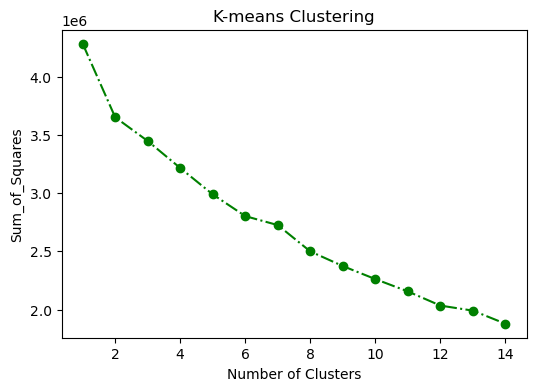

In [752]:
# selected_features = np.array(data.columns.drop(['attack_type']))[selector.get_support()]
# print(selected_features)
mp.figure(figsize = (6,4))
mp.plot(range(1, 15), Sum_of_Squares, marker = 'o', linestyle = '-.',color='green')
mp.xlabel('Number of Clusters')
mp.ylabel('Sum_of_Squares')
mp.title('K-means Clustering')
mp.show()

In [754]:

# optimal_k = 5  # the optimal number of clusters based on the elbow point

# # Perform k-means clustering with the optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
# kmeans.fit(p_data)

# # Assign the cluster labels to the data points
# cluster_labels = kmeans.labels_
kMean = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_mean = kMean.fit_predict(dropx)
y_mean

array([2, 0, 0, ..., 2, 0, 2])

In [755]:
dropx['clusterLabel'] = kmeans.labels_
dropx.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,occurance,clusterLabel
8,-0.110253,-0.124905,1.209585,-0.736170,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,...,-0.072411,-0.374537,0.734273,-0.837031,-0.960490,-0.174444,-0.480113,-0.289115,0.653017,2
97919,-0.110253,-0.124905,-0.442157,0.751153,-0.007706,-0.003701,-0.014089,-0.08949,-0.007736,-0.095079,...,-0.349697,-0.374537,0.401604,1.258683,1.066483,-0.439097,-0.480113,-0.200279,0.653017,0
85178,-0.110253,-0.124905,-0.442157,0.751153,-0.007710,-0.004401,-0.014089,-0.08949,-0.007736,-0.095079,...,-0.349697,-0.374537,-1.654896,1.258683,1.066483,-0.439097,-0.285890,0.155065,0.653017,0
88271,-0.110253,-0.124905,1.087234,-0.736170,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,...,-0.016954,-0.374537,0.734273,-0.873164,-1.005039,-0.121513,-0.480113,-0.289115,0.653017,2
8340,-0.110253,-0.124905,-0.442157,-0.736170,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,...,2.423161,-0.374537,0.734273,-0.493768,-0.626373,-0.333236,-0.480113,-0.289115,-0.220441,2


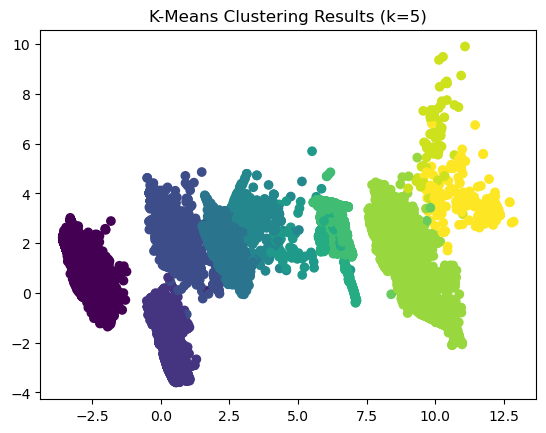

In [756]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dropx)

# Plot the first two principal components with color-coded clusters
mp.scatter(X_pca[:, 0], X_pca[:, 1], c=dropx.clusterLabel)
mp.title('K-Means Clustering Results (k=5)')
mp.show()